<a href="https://colab.research.google.com/github/asrofialkindi/cnn/blob/main/Notebook_SpeechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUMBER DATA**

Data yang digunakan menggunakan 3 (Tiga) video **Debat Calon Presiden** tahun 2024 dengan penjelasan sebagai berikut.


1.   Debat Pertama : **Selasa, 12 Desember 2023**
Tema debat (Capres): Pemerintahan, Hukum, HAM, Pemberantasan Korupsi, Penguatan Demokrasi, Peningkatan Layanan Publik dan Kerukunan Warga.
> *   *Sumber : Channel Youtube '**Liputan6**'*.
> *   Link Youtube : [Access Video Link](https://www.youtube.com/watch?v=9J_Py_cAAQI)

2.   Debat Kedua : **Minggu, 7 Januari 2024**
Tema debat (Capres): Pertahanan, Keamanan, Hubungan Internasional dan Geopolitik.
> *   *Sumber : Channel Youtube '**METRO TV**'*.
> *   Link Youtube : [Access Video Link](https://www.youtube.com/watch?v=gKNqF9jOhZ4)

3.   Debat Ketiga : **Minggu, 4 Februari 2024**
Tema debat (Capres): Kesejahteraan Sosial, Kebudayaan, Pendidikan, Teknologi Informasi, Kesehatan, Ketenagakerjaan, Sumber Daya Manusia, dan Inklusi.
> *   *Sumber : Channel Youtube '**KOMPASTV**'*.
> *   Link Youtube : [Access Video Link](https://youtu.be/fyiCNdb9Pa0?si=_8OQH7B-ksFg87SF)


# **PENYUNTINGAN VIDEO**

Penyuntingan video dilakukan secara **Manual**, dengan memotong perbagian video saat setiap **kandidat (Prabowo, Ganjar, Anies)** berbicara, ini dilakukan untuk setiap video debat.

> Berikut adalah contoh struktur folder hasil penyuntingan.

> > ![Struktur Folder Drive](https://raw.githubusercontent.com/Gito0303/Direktori-Struktur/main/Screen%20Shot%202024-10-24%20at%2019.10.18.png)


Hasil Penyuntingan adalah sebagai berikut.


*   Setiap kandidat memiliki **18 bagian** video dalam format **.mp4**
*   Terdapat folder kandidat yang memiliki **lebih dari 18 bagian**, karena memiliki durasi yang cukup panjang, sehingga bisa terjadi masalah dalam mentranskripsi, sehingga video tersebut **dibagi menjadi 2 bagian** lagi yaitu **a** dan **b**
*   Hasil penyuntingan video juga bisa diakses pada link drive berikut : [Access Here](https://drive.google.com/drive/folders/11sEbLy_g5ni5Gy3fWDoXObkh6WFGFF4X?usp=sharing)




# **PYTHON PROGRAM (VIDEO --> TEXT)**

##**LIBRARY**



> Install library **SpeechRecognition**





> > *Library ini digunakan nantinya untuk mengubah dataset ke dalam bentuk transkrip/teks/kalimat (dalam hal ini, berbentuk file .**txt**)*

> > ***Implementasinya dapat dilihat pada daftar isi, bagian 'SPEECH-TO-TEXT'***



In [ ]:
!pip install SpeechRecognition pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 38.4 MB/s eta 0:00:00




> Install library **WordCloud**




> > *Kemudian untuk Library ini digunakan nantinya untuk mendapatkan **kata/frasa** yang paling sering diucapkan oleh setiap kandidat dalam debat yang dianalis)*

> > ***Implementasinya dapat dilihat pada daftar isi, bagian 'EXPLORATORY DATA ANALYSIS' -> 'Implementasi EDA untuk Hasil Keseluruhan' -> 'WordCloud'***

In [ ]:
!pip install wordcloud



> ***Selanjutnya, terdapat beberapa library yang akan digunakan dalam setiap proses yang dilakukan didalam google collab ini.***





In [ ]:
# Library Umum
from google.colab import drive
import os
from moviepy.editor import VideoFileClip
import speech_recognition as sr
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from collections import Counter

# Library EDA Video
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Library EDA Audio
import librosa
import numpy as np
import soundfile as sf


  if event.key is 'enter':





> ***Dibawah ini terdapat perintah ya digunakan untuk mengunduh daftar stopwords (kata-kata umum yang biasanya diabaikan dalam pemrosesan bahasa alami) dari library Natural Language Toolkit (NLTK). Ini akan diimplementasi bersamaan dengan pembentukan WordCloud nya nanti***


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##**CONNECT DRIVE**



> Mount Drive





> > *Ini dilakukan untuk menghubungkan collab dengan drive untuk mengambil dataset yang sudah di sunting sebelumnya, karena dalam hal ini dataset yang digunakan disimpan dalam folder google drive (Namun, bisa disesuaikan jika lebih terbiasa menggunakan cara lain seperti melalui github)*





In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


##**EKSTRAKSI AUDIO**



> ***Pada Tahap ini dilakukan Ektraksi Audio (mengubah video yang sebelumnya telah di sunting menjadi format audio)***

> Berikut disertakan folder input (folder yang menyimpan video hasil suntingan) : [Access Here](https://drive.google.com/drive/folders/11sEbLy_g5ni5Gy3fWDoXObkh6WFGFF4X?usp=sharing)

> Berikut disertakan folder output (folder yang menyimpan audio hasil Ekstraksi) : [Access Here](https://drive.google.com/drive/folders/1BxAvuDUCRSWrKFCN0uuRAbvPq6uD6Nui?usp=sharing)


> > *{mengingat dataset diambil melalui drive, silahkan di download terlebih dahulu **folder input** diatas lalu di upload ke drive masing masing, kemudian ganti path **video_root** dibawah ini.}*





> Path folder utama dataset video dan output audio



In [ ]:
video_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder video pada drive anda
audio_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder tujuan penyimpanan audio (bisa mencantumkan nama folder yang belum ada)



> Penanganan jika foldder output untuk audio belum ada





> > *Tujuannya untuk membuat path folder jika path pada **audio_root** nya belum ada di drive anda*





In [ ]:
if not os.path.exists(audio_root):
    os.makedirs(audio_root)



> Ekstraksi Audio



In [ ]:
for root, dirs, files in os.walk(video_root):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".mkv"):
            # Dapatkan jalur lengkap untuk video
            video_path = os.path.join(root, file)

            # Buat folder audio sesuai dengan struktur folder video
            relative_path = os.path.relpath(root, video_root)
            audio_folder = os.path.join(audio_root, relative_path)

            # Buat folder audio jika belum ada
            if not os.path.exists(audio_folder):
                os.makedirs(audio_folder)

            # Simpan audio yang diekstraksi
            audio_path = os.path.join(audio_folder, file.split('.')[0] + '.wav')
            video_clip = VideoFileClip(video_path)
            video_clip.audio.write_audiofile(audio_path)
            print(f"Audio extracted dan disimpan ke {audio_path}")

MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Ganjar/Debat Pertama (Ganjar Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Pertama/Anis/Debat Pertama (Anies Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 1).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 1).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Prabowo/Debat Kedua (Prabowo Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Ganjar/Debat Kedua (Ganjar Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 1).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 1).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Kedua/Anis/Debat Kedua (Anis Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 18).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 18).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Prabowo/Debat Ketiga (Prabowo Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 18b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 18b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 16).wav


chunk:  97%|█████████▋| 2466/2550 [00:03<00:00, 495.77it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/audio/io/readers.py:197: UserWarning: Error in file /content/drive/My Drive/kuliah/Publikasi/Dataset Video/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 16).mp4, At time t=115.59-115.64 seconds, indices wanted: 99797-101796, but len(buffer)=99798
index 99798 is out of bounds for axis 0 with size 99798
  warnings.warn("Error in file %s, "%(self.filename)+



MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 2).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 2).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 18a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 18a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Ganjar/Debat Ketiga (Ganjar Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 7).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 7).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 4).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 4).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 2a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 2a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 12).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 12).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 11).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 11).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 10).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 10).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 13).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 13).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 17).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 17).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 16).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 16).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 1b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 1b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 18b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 18b).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 3).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 3).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 5).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 5).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 8).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 8).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 6).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 6).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 18a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 18a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 1a).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 1a).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 15).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 15).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 14).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 14).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 9).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 9).wav
MoviePy - Writing audio in /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 2b).wav


MoviePy - Done.
Audio extracted dan disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Audio/Debat Ketiga/Anis/Debat Ketiga (Anis Bagian 2b).wav


##**SPEECH-TO-TEXT**

> ***Pada Tahap ini dilakukan Transcription (mengubah audio yang sebelumnya telah dihasilkan pada tahap Ekstraksi menjadi format teks/.txt)***

> Berikut disertakan folder input (folder yang menyimpan audio hasil Ektraksi) : [Access Here](https://drive.google.com/drive/folders/1BxAvuDUCRSWrKFCN0uuRAbvPq6uD6Nui?usp=sharing)

> Berikut disertakan folder output (folder yang menyimpan teks hasil Transkripsi) : [Access Here](https://drive.google.com/drive/folders/1mcyoKTcQWGkhbdJf8vDlmfistE9ytY_j?usp=sharing)



> Path folder utama dataset audio dan hasil transkripsi



In [ ]:
audio_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder audio pada drive anda (yang sebelumnya juga sudah diinisialisasi sebagai output)
output_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder tujuan penyimpanan transkripsi (bisa mencantumkan nama folder yang belum ada)



> Penanganan jika foldder output untuk audio belum ada



In [ ]:
if not os.path.exists(output_root):
    os.makedirs(output_root)



> Inisialisasi untuk menggunakan library dari **SpeechRecognition** untuk dilakukan Transkription



In [ ]:
recognizer = sr.Recognizer()



> Fungsi untuk melakukan transkripsi



In [ ]:
def transcribe_audio_speech_recognition(audio_path):
    try:
        # Load file audio
        with sr.AudioFile(audio_path) as source:
            audio = recognizer.record(source)

        # Gunakan Google Web Speech API untuk melakukan transkripsi
        text = recognizer.recognize_google(audio, language='id-ID')
        return text

    except sr.UnknownValueError:
        return "Audio tidak dapat dikenali."
    except sr.RequestError as e:
        return f"Terdapat kesalahan pada request: {e}"



> Transcription dilakukan



In [ ]:
for root, dirs, files in os.walk(audio_root):
    for file in files:
        if file.endswith(".wav"):
            # Dapatkan jalur lengkap untuk audio
            audio_path = os.path.join(root, file)

            # Buat folder teks sesuai dengan struktur folder audio
            relative_path = os.path.relpath(root, audio_root)
            output_folder = os.path.join(output_root, relative_path)

            # Buat folder output jika belum ada
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)

            # Transkripsikan audio
            print(f"Transcribing : {file}")
            transcription = transcribe_audio_speech_recognition(audio_path)

            # Simpan hasil transkripsi ke file teks
            output_text = os.path.join(output_folder, file.split('.')[0] + '.txt')
            with open(output_text, 'w') as f:
                f.write(transcription)

            print(f"Transcription disimpan ke {output_text}")

Transcribing : Debat Pertama (Prabowo Bagian 1a).wav
Transcription disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Teks/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1a).txt
Transcribing : Debat Pertama (Prabowo Bagian 1b).wav
Transcription disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Teks/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 1b).txt
Transcribing : Debat Pertama (Prabowo Bagian 2).wav
Transcription disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Teks/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 2).txt
Transcribing : Debat Pertama (Prabowo Bagian 3).wav
Transcription disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Teks/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 3).txt
Transcribing : Debat Pertama (Prabowo Bagian 4).wav
Transcription disimpan ke /content/drive/My Drive/kuliah/Publikasi/Dataset Teks/Debat Pertama/Prabowo/Debat Pertama (Prabowo Bagian 4).txt
Transcribing : Debat Pertama (Prabowo Bag

##**HASIL KOMBINASI TXT**

> ***Pada Tahap ini dilakukan Penggabungan File txt  (menggabungkan semua file txt untuk setiap kandidat pada setiap debat)***

> Berikut disertakan folder input (folder yang menyimpan teks hasil Transkripsi) : [Access Here](https://drive.google.com/drive/folders/1mcyoKTcQWGkhbdJf8vDlmfistE9ytY_j?usp=sharing)

> Berikut disertakan folder output (folder yang menyimpan hasil Penggabungan .txt) : [Access Here](https://drive.google.com/drive/folders/1S2DJReB4mie_81x_IudzOppGi1COVf4F?usp=sharing)



> Path folder utama dataset text dan hasil kombinasi



In [ ]:
transcription_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder teks pada drive anda (yang sebelumnya juga sudah diinisialisasi sebagai output)
combined_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder tujuan penyimpanan gabungan transkripsi (bisa mencantumkan nama folder yang belum ada)




> Penanganan jika foldder output untuk audio belum ada



In [ ]:
if not os.path.exists(combined_root):
    os.makedirs(combined_root)



> Inisialisasi nama folder tujuan dan kandidat



In [ ]:
# Nama folder untuk setiap debat
debates = ["Debat Pertama", "Debat Kedua", "Debat Ketiga"]

# Nama kandidat
candidates = ["Prabowo", "Ganjar", "Anis"]



> Kombinasikan



In [ ]:
for debate in debates:
    debate_path = os.path.join(transcription_root, debate)

    # Buat folder kombinasi untuk debat
    combined_debate_folder = os.path.join(combined_root, debate)
    if not os.path.exists(combined_debate_folder):
        os.makedirs(combined_debate_folder)

    # Loop melalui setiap kandidat
    for candidate in candidates:
        candidate_folder = os.path.join(debate_path, candidate)

        # Buat file gabungan untuk setiap kandidat
        combined_file_path = os.path.join(combined_debate_folder, f"{candidate}.txt")
        with open(combined_file_path, 'w') as combined_file:

            # Loop melalui semua bagian di dalam folder kandidat
            for part_filename in sorted(os.listdir(candidate_folder)):
                if part_filename.endswith(".txt"):
                    part_path = os.path.join(candidate_folder, part_filename)

                    # Baca isi file dan tambahkan ke file kombinasi
                    with open(part_path, 'r') as part_file:
                        combined_file.write(part_file.read())
                        combined_file.write("\n")

        print(f"File gabungan untuk {candidate} di {debate} telah dibuat: {combined_file_path}")

File gabungan untuk Prabowo di Debat Pertama telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Pertama/Prabowo.txt
File gabungan untuk Ganjar di Debat Pertama telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Pertama/Ganjar.txt
File gabungan untuk Anis di Debat Pertama telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Pertama/Anis.txt
File gabungan untuk Prabowo di Debat Kedua telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Kedua/Prabowo.txt
File gabungan untuk Ganjar di Debat Kedua telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Kedua/Ganjar.txt
File gabungan untuk Anis di Debat Kedua telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Kedua/Anis.txt
File gabungan untuk Prabowo di Debat Ketiga telah dibuat: /content/drive/My Drive/kuliah/Publikasi/Hasil Kombinasi/Debat Ketiga/Prabowo.txt
File gabungan untuk Ganjar di Debat 

##**EXPLORATORY DATA ANALYSIS**



> Folder Root Video



In [ ]:
video_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder video pada drive anda



> Folder Root Audio



In [ ]:
audio_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder audio pada drive anda



> Folder Root Teks



In [ ]:
text_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder teks pada drive anda



> *{Kenapa perlu diinisialisasi lagi untuk path **video**, **audio**, maupun **teks** nya, karena hal ini dilakukan agar ketika proses pada bagian daftar isi seperti '**EKSTRAKSI AUDIO**', '**SPEECH-TO-TEXT**', '**HASIL KOMBINASI TXT**' sudah dijalankan atau datanya sudah ada pada drive anda, makan anda hanya perlu menjalankan bagian '**LIBRARY**', '**CONNECT DRIVE**', dan '**EXPLORATORY DATA ANALYSIS**' saja.}*



###**Implementasi EDA untuk Video**



In [ ]:
# Debat dan kandidat
debates = ['Debat Pertama', 'Debat Kedua', 'Debat Ketiga']
candidates = ['Prabowo', 'Ganjar', 'Anis']

# Inisialisasi dictionary untuk menyimpan jumlah video
video_count = {candidate: {debate: 0 for debate in debates} for candidate in candidates}

# Looping melalui setiap debat dan kandidat untuk menghitung jumlah video
for debate in debates:
    for candidate in candidates:
        candidate_folder = os.path.join(video_root, debate, candidate)
        if os.path.exists(candidate_folder):
            # Hitung jumlah file video (yang berformat .mp4 atau .mkv)
            video_files = [f for f in os.listdir(candidate_folder) if f.endswith(('.mp4', '.mkv'))]
            video_count[candidate][debate] = len(video_files)

# Hitung total video untuk setiap kandidat dan total keseluruhan
total_per_candidate = {candidate: sum(video_count[candidate].values()) for candidate in candidates}
total_videos = sum(total_per_candidate.values())

# Cetak tabel dalam format yang rapi
print("+-----------------------------------------------------------+")
print("|  Jumlah Video Kandidat Berdasarkan Debat                  |")
print("+-----------------------------------------------------------+")
print("|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |")
print("+-----------------------------------------------------------+")

for candidate in candidates:
    debate_1 = video_count[candidate]['Debat Pertama']
    debate_2 = video_count[candidate]['Debat Kedua']
    debate_3 = video_count[candidate]['Debat Ketiga']
    total = total_per_candidate[candidate]
    print(f"|  {candidate:<9} |    {debate_1:<6} |    {debate_2:<6} |    {debate_3:<6} |   {total:<5}  |")

print("+-----------------------------------------------------------+")
print(f"|  Total     |    {sum(video_count['Prabowo'].values()):<6} |    {sum(video_count['Ganjar'].values()):<6} |    {sum(video_count['Anis'].values()):<6} |  {total_videos:<5}   |")
print("+-----------------------------------------------------------+")

+-----------------------------------------------------------+
|  Jumlah Video Kandidat Berdasarkan Debat                  |
+-----------------------------------------------------------+
|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |
+-----------------------------------------------------------+
|  Prabowo   |    19     |    18     |    19     |   56     |
|  Ganjar    |    19     |    19     |    20     |   58     |
|  Anis      |    19     |    18     |    21     |   58     |
+-----------------------------------------------------------+
|  Total     |    56     |    58     |    58     |  172     |
+-----------------------------------------------------------+




> Dataframe untuk menyimpan durasi video



In [ ]:
video_data = []

# Looping untuk setiap video
for root, dirs, files in os.walk(video_root):
    for file in files:
        if file.endswith((".mp4", ".mkv")):
            video_path = os.path.join(root, file)
            video_clip = VideoFileClip(video_path)
            duration = video_clip.duration  # durasi dalam detik
            width, height = video_clip.size  # resolusi video (width x height)
            format_video = file.split('.')[-1]  # format video berdasarkan ekstensi

            # Tentukan kategori resolusi
            if height == 720:
                resolution = '720p'
            elif height == 1080:
                resolution = '1080p'
            else:
                resolution = 'other'

            video_data.append([file, duration, resolution, format_video])

# Buat dataframe
video_df = pd.DataFrame(video_data, columns=["Video", "Durasi (detik)", "Resolusi", "Format"])
video_df.to_csv('video_metadata.csv', index=False)
video_df

Video  Durasi (detik) Resolusi Format
0    Debat Pertama (Prabowo Bagian 1a).mp4          122.83    1080p    mp4
1    Debat Pertama (Prabowo Bagian 1b).mp4          120.58    1080p    mp4
2     Debat Pertama (Prabowo Bagian 2).mp4          128.46    1080p    mp4
3     Debat Pertama (Prabowo Bagian 3).mp4           50.13    1080p    mp4
4     Debat Pertama (Prabowo Bagian 4).mp4           42.75    1080p    mp4
..                                     ...             ...      ...    ...
167    Debat Ketiga (Ganjar Bagian 15).mp4           59.07     720p    mp4
168    Debat Ketiga (Ganjar Bagian 16).mp4          115.64     720p    mp4
169    Debat Ketiga (Ganjar Bagian 17).mp4           62.69     720p    mp4
170   Debat Ketiga (Ganjar Bagian 18a).mp4          126.29     720p    mp4
171   Debat Ketiga (Ganjar Bagian 18b).mp4          114.92     720p    mp4

[172 rows x 4 columns]



> Visualisasi



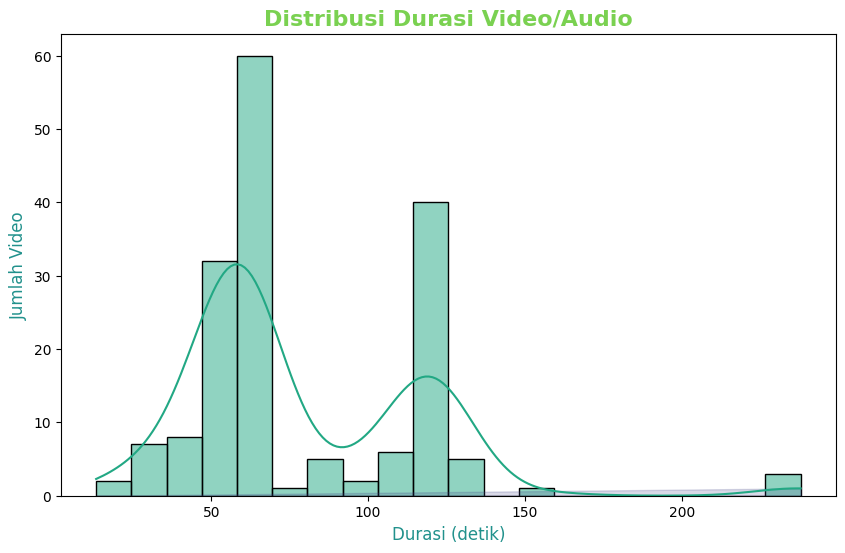

In [ ]:
# Membuat warna gradasi
cmap = plt.get_cmap('viridis')

# Plot distribusi durasi video
plt.figure(figsize=(10, 6))

# Membuat histogram dengan gradasi warna berdasarkan nilai KDE
sns.histplot(video_df['Durasi (detik)'], bins=20, kde=True, color=cmap(0.6))

# Menambahkan gradasi warna di latar belakang
x = np.linspace(min(video_df['Durasi (detik)']), max(video_df['Durasi (detik)']), 1000)
y = np.linspace(0, 1, 1000)
plt.fill_between(x, y, color=cmap(0.2), alpha=0.2)

# Menambahkan judul dan label dengan styling
plt.title('Distribusi Durasi Video/Audio', fontsize=16, fontweight='bold', color=cmap(0.8))
plt.xlabel('Durasi (detik)', fontsize=12, color=cmap(0.5))
plt.ylabel('Jumlah Video', fontsize=12, color=cmap(0.5))

# Menampilkan plot
plt.show()

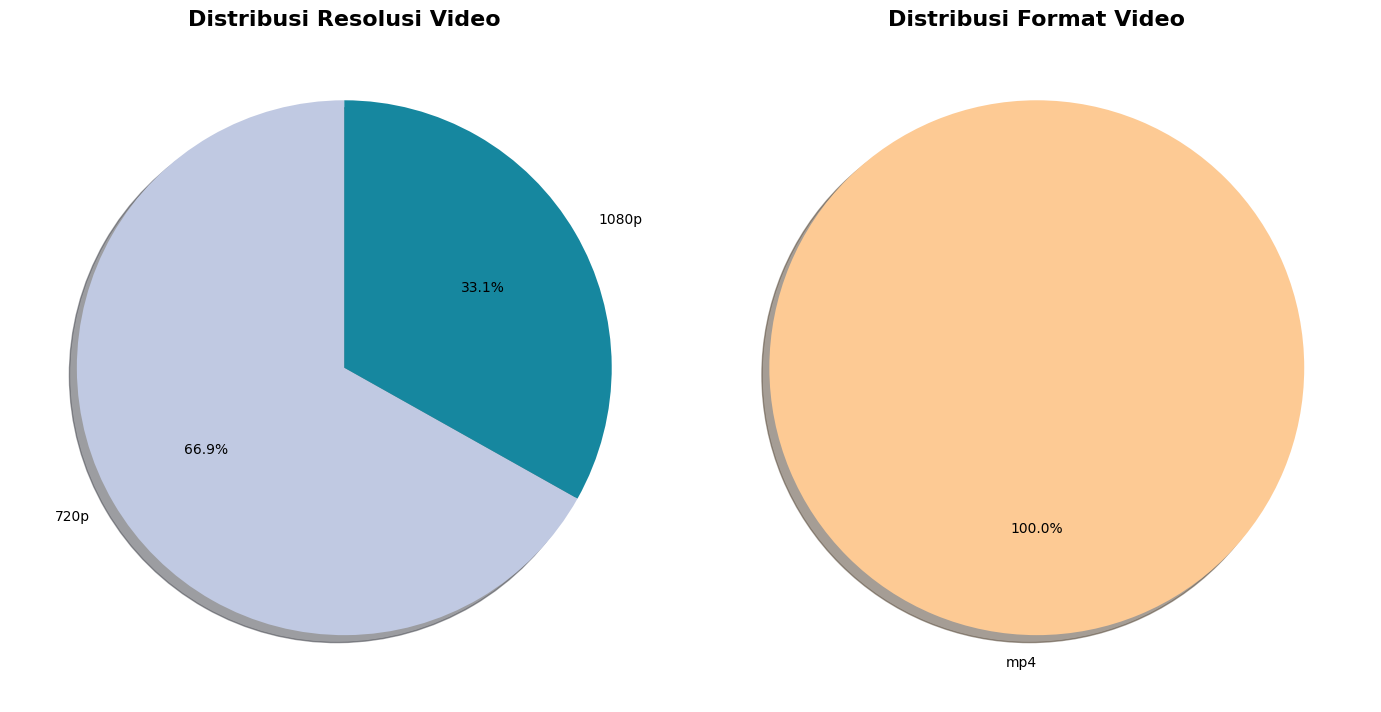

In [ ]:
# Data resolusi dan format video
resolusi_counts = video_df['Resolusi'].value_counts()
format_counts = video_df['Format'].value_counts()

# Membuat subplot untuk tampilan horizontal
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Warna yang digunakan dengan gradasi
colors_res = plt.cm.PuBuGn(np.linspace(0.3, 0.7, len(resolusi_counts)))
colors_fmt = plt.cm.OrRd(np.linspace(0.3, 0.7, len(format_counts)))

# Plot pie chart untuk distribusi resolusi video
axes[0].pie(resolusi_counts, labels=resolusi_counts.index, autopct='%1.1f%%', startangle=90,
            colors=colors_res, shadow=True, explode=[0.05 if i == resolusi_counts.idxmax() else 0 for i in range(len(resolusi_counts))])
axes[0].set_title('Distribusi Resolusi Video', fontsize=16, fontweight='bold')

# Plot pie chart untuk distribusi format video
axes[1].pie(format_counts, labels=format_counts.index, autopct='%1.1f%%', startangle=90,
            colors=colors_fmt, shadow=True, explode=[0.05 if i == format_counts.idxmax() else 0 for i in range(len(format_counts))])
axes[1].set_title('Distribusi Format Video', fontsize=16, fontweight='bold')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

###**Implementasi EDA untuk Audio**



In [ ]:
# Debat dan kandidat
debates = ['Debat Pertama', 'Debat Kedua', 'Debat Ketiga']
candidates = ['Prabowo', 'Ganjar', 'Anis']

# Inisialisasi dictionary untuk menyimpan jumlah audio
audio_count = {candidate: {debate: 0 for debate in debates} for candidate in candidates}

# Looping melalui setiap debat dan kandidat untuk menghitung jumlah audio
for debate in debates:
    for candidate in candidates:
        candidate_folder = os.path.join(audio_root, debate, candidate)
        if os.path.exists(candidate_folder):
            # Hitung jumlah file audio (yang berformat .wav atau format lain)
            audio_files = [f for f in os.listdir(candidate_folder) if f.endswith('.wav')]
            audio_count[candidate][debate] = len(audio_files)

# Hitung total audio untuk setiap kandidat dan total keseluruhan
total_per_candidate = {candidate: sum(audio_count[candidate].values()) for candidate in candidates}
total_audios = sum(total_per_candidate.values())

# Cetak tabel dalam format yang rapi
print("+-----------------------------------------------------------+")
print("|  Jumlah Audio Kandidat Berdasarkan Debat                  |")
print("+-----------------------------------------------------------+")
print("|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |")
print("+-----------------------------------------------------------+")

for candidate in candidates:
    debate_1 = audio_count[candidate]['Debat Pertama']
    debate_2 = audio_count[candidate]['Debat Kedua']
    debate_3 = audio_count[candidate]['Debat Ketiga']
    total = total_per_candidate[candidate]
    print(f"|  {candidate:<9} |    {debate_1:<6} |    {debate_2:<6} |    {debate_3:<6} |   {total:<5}  |")

print("+-----------------------------------------------------------+")
print(f"|  Total     |    {sum(audio_count['Prabowo'].values()):<6} |    {sum(audio_count['Ganjar'].values()):<6} |    {sum(audio_count['Anis'].values()):<6} |  {total_audios:<5}   |")
print("+-----------------------------------------------------------+")

+-----------------------------------------------------------+
|  Jumlah Audio Kandidat Berdasarkan Debat                  |
+-----------------------------------------------------------+
|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |
+-----------------------------------------------------------+
|  Prabowo   |    19     |    18     |    19     |   56     |
|  Ganjar    |    19     |    19     |    20     |   58     |
|  Anis      |    19     |    18     |    21     |   58     |
+-----------------------------------------------------------+
|  Total     |    56     |    58     |    58     |  172     |
+-----------------------------------------------------------+




> Dataframe untuk menyimpan durasi video



In [ ]:
audio_data = []

# Looping untuk setiap file audio
for root, dirs, files in os.walk(audio_root):
    for file in files:
        if file.endswith((".wav", ".mp3")):
            audio_path = os.path.join(root, file)

            # Mendapatkan durasi audio dengan librosa
            duration = librosa.get_duration(filename=audio_path)

            # Mendapatkan informasi audio (termasuk jumlah channel)
            audio_info = sf.info(audio_path)
            channels = audio_info.channels  # Mendapatkan jumlah channel audio

            # Mendapatkan format audio dari ekstensi file
            format_audio = file.split('.')[-1]

            audio_data.append([file, duration, channels, format_audio])

# Buat dataframe
audio_df = pd.DataFrame(audio_data, columns=["Audio", "Durasi (detik)", "Jumlah Channel", "Format"])
audio_df.to_csv('audio_metadata.csv', index=False)
audio_df

	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_path)



Audio  Durasi (detik)  Jumlah Channel  \
0    Debat Pertama (Prabowo Bagian 1a).wav          122.83               2   
1    Debat Pertama (Prabowo Bagian 1b).wav          120.58               2   
2     Debat Pertama (Prabowo Bagian 2).wav          128.46               2   
3     Debat Pertama (Prabowo Bagian 3).wav           50.13               2   
4     Debat Pertama (Prabowo Bagian 4).wav           42.75               2   
..                                     ...             ...             ...   
167      Debat Ketiga (Anis Bagian 1a).wav          120.03               2   
168      Debat Ketiga (Anis Bagian 15).wav           61.19               2   
169      Debat Ketiga (Anis Bagian 14).wav           51.78               2   
170       Debat Ketiga (Anis Bagian 9).wav           61.30               2   
171      Debat Ketiga (Anis Bagian 2b).wav          120.14               2   

    Format  
0      wav  
1      wav  
2      wav  
3      wav  
4      wav  
..     ...  
167    wav  
168    wav  
169    wav  
170    wav  
171    wav  

[172 rows x 4 columns]



> Visualisasi



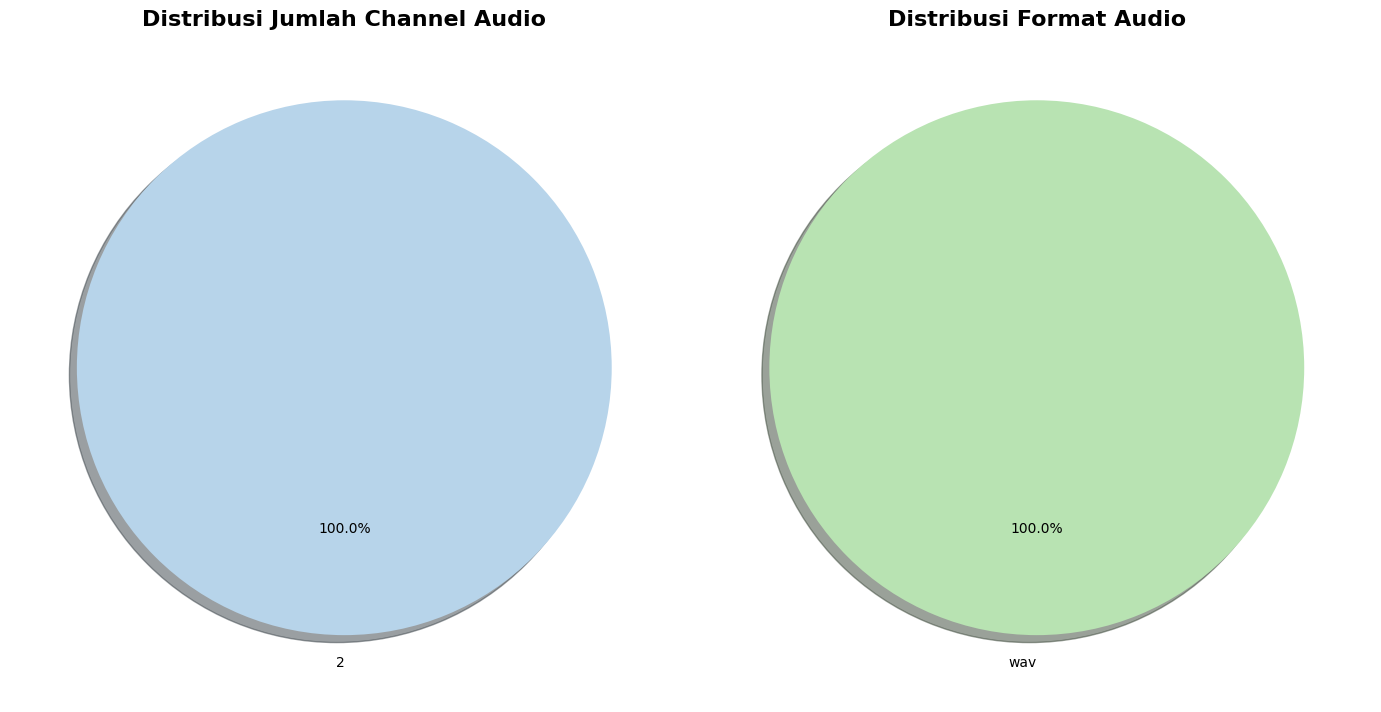

In [ ]:
# Data jumlah channel dan format audio
channel_counts = audio_df['Jumlah Channel'].value_counts()
format_counts = audio_df['Format'].value_counts()

# Membuat subplot untuk tampilan horizontal
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Warna yang digunakan dengan gradasi
colors_channel = plt.cm.Blues(np.linspace(0.3, 0.7, len(channel_counts)))
colors_format = plt.cm.Greens(np.linspace(0.3, 0.7, len(format_counts)))

# Plot pie chart untuk distribusi jumlah channel audio
axes[0].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90,
            colors=colors_channel, shadow=True, explode=[0.05 if i == channel_counts.idxmax() else 0 for i in range(len(channel_counts))])
axes[0].set_title('Distribusi Jumlah Channel Audio', fontsize=16, fontweight='bold')

# Plot pie chart untuk distribusi format audio
axes[1].pie(format_counts, labels=format_counts.index, autopct='%1.1f%%', startangle=90,
            colors=colors_format, shadow=True, explode=[0.05 if i == format_counts.idxmax() else 0 for i in range(len(format_counts))])
axes[1].set_title('Distribusi Format Audio', fontsize=16, fontweight='bold')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

###**Implementasi EDA untuk Teks**



In [ ]:
# Debat dan kandidat
debates = ['Debat Pertama', 'Debat Kedua', 'Debat Ketiga']
candidates = ['Prabowo', 'Ganjar', 'Anis']

# Inisialisasi dictionary untuk menyimpan jumlah teks
text_count = {candidate: {debate: 0 for debate in debates} for candidate in candidates}

# Looping melalui setiap debat dan kandidat untuk menghitung jumlah teks
for debate in debates:
    for candidate in candidates:
        candidate_folder = os.path.join(text_root, debate, candidate)
        if os.path.exists(candidate_folder):
            # Hitung jumlah file teks (yang berformat .txt)
            text_files = [f for f in os.listdir(candidate_folder) if f.endswith('.txt')]
            text_count[candidate][debate] = len(text_files)

# Hitung total teks untuk setiap kandidat dan total keseluruhan
total_per_candidate = {candidate: sum(text_count[candidate].values()) for candidate in candidates}
total_texts = sum(total_per_candidate.values())

# Cetak tabel dalam format yang rapi
print("+-----------------------------------------------------------+")
print("|  Jumlah Teks Kandidat Berdasarkan Debat                   |")
print("+-----------------------------------------------------------+")
print("|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |")
print("+-----------------------------------------------------------+")

for candidate in candidates:
    debate_1 = text_count[candidate]['Debat Pertama']
    debate_2 = text_count[candidate]['Debat Kedua']
    debate_3 = text_count[candidate]['Debat Ketiga']
    total = total_per_candidate[candidate]
    print(f"|  {candidate:<9} |    {debate_1:<6} |    {debate_2:<6} |    {debate_3:<6} |   {total:<5}  |")

print("+-----------------------------------------------------------+")
print(f"|  Total     |    {sum(text_count['Prabowo'].values()):<6} |    {sum(text_count['Ganjar'].values()):<6} |    {sum(text_count['Anis'].values()):<6} |  {total_texts:<5}   |")
print("+-----------------------------------------------------------+")

+-----------------------------------------------------------+
|  Jumlah Teks Kandidat Berdasarkan Debat                   |
+-----------------------------------------------------------+
|  Kandidat  |  Debat 1  |  Debat 2  |  Debat 3  |  Total   |
+-----------------------------------------------------------+
|  Prabowo   |    19     |    18     |    19     |   56     |
|  Ganjar    |    19     |    19     |    20     |   58     |
|  Anis      |    19     |    18     |    21     |   58     |
+-----------------------------------------------------------+
|  Total     |    56     |    58     |    58     |  172     |
+-----------------------------------------------------------+




> Dataframe untuk menyimpan jumlah kata



In [ ]:
# Fungsi untuk menghitung jumlah kata
def count_words(text):
    return len(text.split())

# Data list untuk jumlah kata dan format teks
text_data = []

# Looping untuk setiap file teks
for root, dirs, files in os.walk(text_root):
    for file in files:
        if file.endswith(".txt"):
            text_path = os.path.join(root, file)
            with open(text_path, 'r', encoding='utf-8') as f:
                text = f.read()
                word_count = count_words(text)
                format_text = file.split('.')[-1]  # Mendapatkan format file (txt)
                text_data.append([file, word_count, format_text])

# Buat dataframe
text_df = pd.DataFrame(text_data, columns=["Teks", "Jumlah Kata", "Format"])
text_df.to_csv('text_metadata.csv', index=False)
text_df

Teks  Jumlah Kata Format
0    Debat Pertama (Prabowo Bagian 1a).txt          164    txt
1    Debat Pertama (Prabowo Bagian 1b).txt          139    txt
2     Debat Pertama (Prabowo Bagian 2).txt          194    txt
3     Debat Pertama (Prabowo Bagian 3).txt           70    txt
4     Debat Pertama (Prabowo Bagian 4).txt           62    txt
..                                     ...          ...    ...
167      Debat Ketiga (Anis Bagian 1a).txt          239    txt
168      Debat Ketiga (Anis Bagian 15).txt          116    txt
169      Debat Ketiga (Anis Bagian 14).txt           73    txt
170       Debat Ketiga (Anis Bagian 9).txt          135    txt
171      Debat Ketiga (Anis Bagian 2b).txt          241    txt

[172 rows x 3 columns]



> Visualisasi



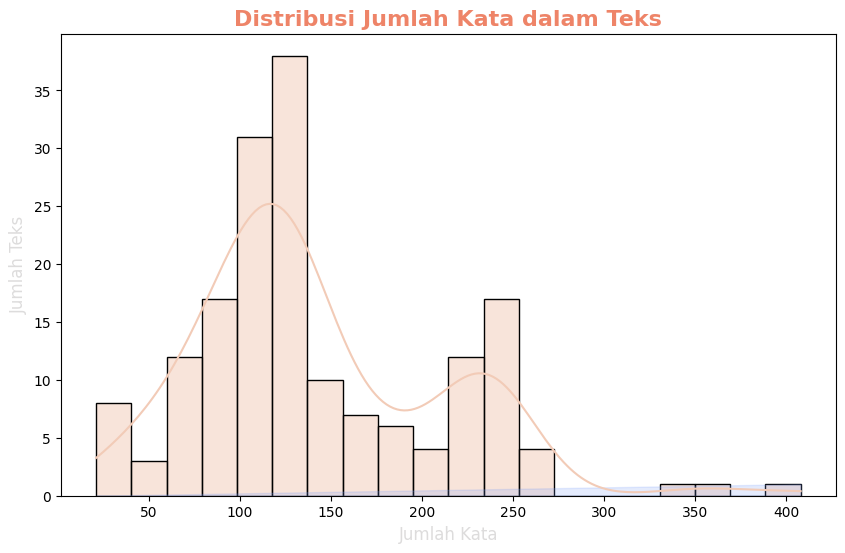

In [ ]:
# Plot distribusi jumlah kata

# Membuat warna gradasi
cmap = plt.get_cmap('coolwarm')

# Plot distribusi jumlah kata dalam teks
plt.figure(figsize=(10, 6))

# Membuat histogram dengan gradasi warna berdasarkan nilai KDE
sns.histplot(text_df['Jumlah Kata'], bins=20, kde=True, color=cmap(0.6))

# Menambahkan gradasi warna di latar belakang
x = np.linspace(min(text_df['Jumlah Kata']), max(text_df['Jumlah Kata']), 1000)
y = np.linspace(0, 1, 1000)
plt.fill_between(x, y, color=cmap(0.2), alpha=0.2)

# Menambahkan judul dan label dengan styling
plt.title('Distribusi Jumlah Kata dalam Teks', fontsize=16, fontweight='bold', color=cmap(0.8))
plt.xlabel('Jumlah Kata', fontsize=12, color=cmap(0.5))
plt.ylabel('Jumlah Teks', fontsize=12, color=cmap(0.5))

# Menampilkan plot
plt.show()


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Format', data=text_df, palette="Set2")



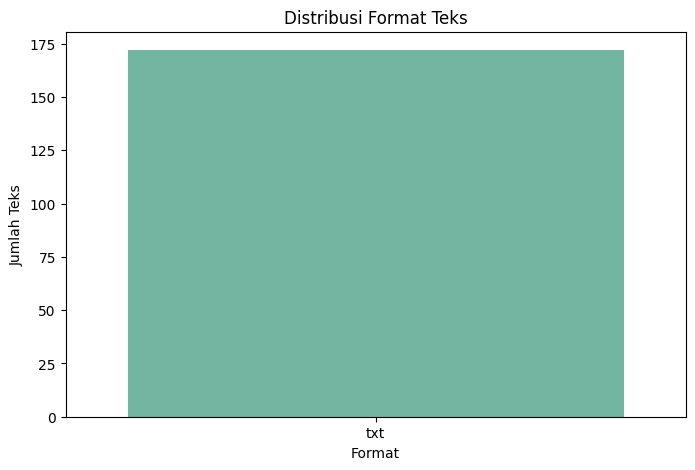

In [ ]:
# Plot distribusi format teks
plt.figure(figsize=(8, 5))
sns.countplot(x='Format', data=text_df, palette="Set2")
plt.title('Distribusi Format Teks')
plt.xlabel('Format')
plt.ylabel('Jumlah Teks')
plt.show()

###**Implementasi EDA untuk Hasil Keseluruhan**



####Total Kata

In [ ]:
# Fungsi untuk menghitung jumlah kata dalam sebuah file teks
def count_words_in_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
    # Hitung jumlah kata
    words = text.split()
    return len(words)

# Debat dan kandidat
debates = ['Debat Pertama', 'Debat Kedua', 'Debat Ketiga']
candidates = ['Prabowo', 'Ganjar', 'Anis']

# Inisialisasi dictionary untuk menyimpan total kata per kandidat dan per debat
total_words_per_debate = {debate: {candidate: 0 for candidate in candidates} for debate in debates}
total_words_per_candidate = {candidate: 0 for candidate in candidates}

# Looping melalui setiap debat dan kandidat untuk menghitung jumlah kata
for debate in debates:
    for candidate in candidates:
        candidate_folder = os.path.join(text_root, debate, candidate)
        if os.path.exists(candidate_folder):
            # Ambil semua file teks
            text_files = [f for f in os.listdir(candidate_folder) if f.endswith('.txt')]
            # Hitung jumlah kata dalam setiap file teks
            for text_file in text_files:
                filepath = os.path.join(candidate_folder, text_file)
                word_count = count_words_in_file(filepath)
                # Tambahkan jumlah kata ke debat dan kandidat yang sesuai
                total_words_per_debate[debate][candidate] += word_count
                total_words_per_candidate[candidate] += word_count

# Hitung total keseluruhan kata dari semua kandidat
total_words_overall = sum(total_words_per_candidate.values())

# Cetak hasil dalam format tabel yang rapi
print("+-----------------------------------------------------------+")
print("|                        Total Kata                         |")
print("+-----------------------------------------------------------+")
for debate in debates:
    print(f"| {debate:<57} |")
    print("+-----------------------------------------------------------+")
    for candidate in candidates:
        print(f"| Total kata ({candidate:<7}) di {debate:<23} |   {total_words_per_debate[debate][candidate]:<4}  |")
    print("+-----------------------------------------------------------+")

# Cetak total kata per kandidat di seluruh debat
print("+-----------------------------------------------------------+")
for candidate in candidates:
    print(f"| Total kata ({candidate:<7}) seluruh debat              |   {total_words_per_candidate[candidate]:<4}  |")
print("+-----------------------------------------------------------+")
print(f"|      Total Kata Seluruhnya                      |   {total_words_overall:<5} |")
print("+-----------------------------------------------------------+")


+-----------------------------------------------------------+
|                        Total Kata                         |
+-----------------------------------------------------------+
| Debat Pertama                                             |
+-----------------------------------------------------------+
| Total kata (Prabowo) di Debat Pertama           |   1702  |
| Total kata (Ganjar ) di Debat Pertama           |   2446  |
| Total kata (Anis   ) di Debat Pertama           |   3023  |
+-----------------------------------------------------------+
| Debat Kedua                                               |
+-----------------------------------------------------------+
| Total kata (Prabowo) di Debat Kedua             |   2358  |
| Total kata (Ganjar ) di Debat Kedua             |   2979  |
| Total kata (Anis   ) di Debat Kedua             |   2938  |
+-----------------------------------------------------------+
| Debat Ketiga                                              |
+-------

####WordCloud



In [ ]:
transcrip_root = '/content/drive/My Drive/????????' # Ganti ???????? dengan path folder gabungan txt pada drive anda

In [ ]:
# Fungsi untuk membuat dan menampilkan word cloud
def buat_wordcloud(teks, judul, semua_kata=True):
    # Menghapus stopwords
    stop_words = set(stopwords.words('indonesian'))
    filtered_words = [word for word in teks.split() if word.lower() not in stop_words]

    # Menghitung frekuensi kata
    word_counts = Counter(filtered_words)

    # Menyimpan ke DataFrame dan menyortir berdasarkan frekuensi
    df_word_counts = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
    df_word_counts = df_word_counts.sort_values(by='Frekuensi', ascending=False)

    # Simpan ke Excel (untuk 20 kata teratas)
    df_top20 = df_word_counts.head(20)
    num_columns = 5
    num_rows = (len(df_top20) + num_columns - 1) // num_columns  # Hitung jumlah baris
    reshaped_data = []

    for i in range(num_rows):
        row_data = []
        for j in range(num_columns):
            index = i + j * num_rows
            if index < len(df_top20):
                row_data.append(df_top20.iloc[index]['Kata'] + f" ({df_top20.iloc[index]['Frekuensi']})")
            else:
                row_data.append("")  # Tambahkan string kosong jika tidak ada data
        reshaped_data.append(row_data)

    # Buat DataFrame baru untuk lima kolom dan simpan
    df_reshaped = pd.DataFrame(reshaped_data)
    df_reshaped.to_excel(f'{judul}_top20.xlsx', index=False, header=False)

    # Membuat word cloud
    if semua_kata:
        # Word Cloud untuk semua kata
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
    else:
        # Word Cloud hanya untuk 20 kata teratas
        top20_words = df_top20.set_index('Kata')['Frekuensi'].to_dict()
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top20_words)

    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(judul)
    plt.axis('off')
    plt.show()

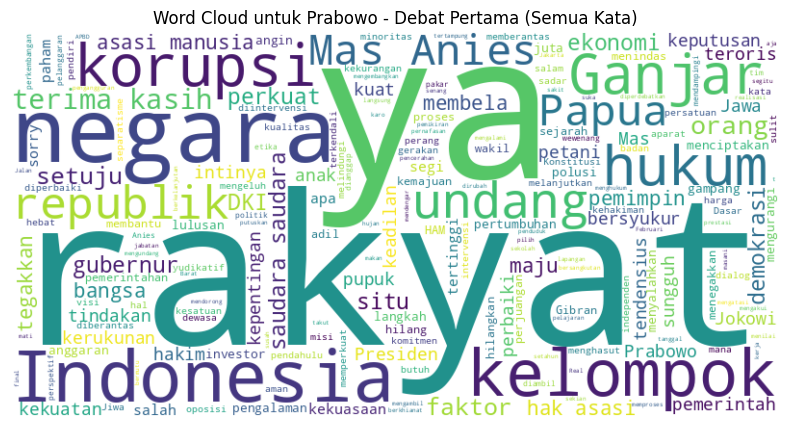

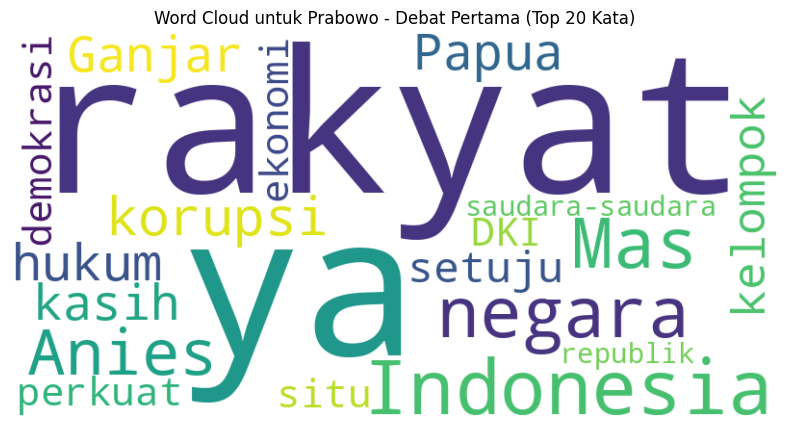

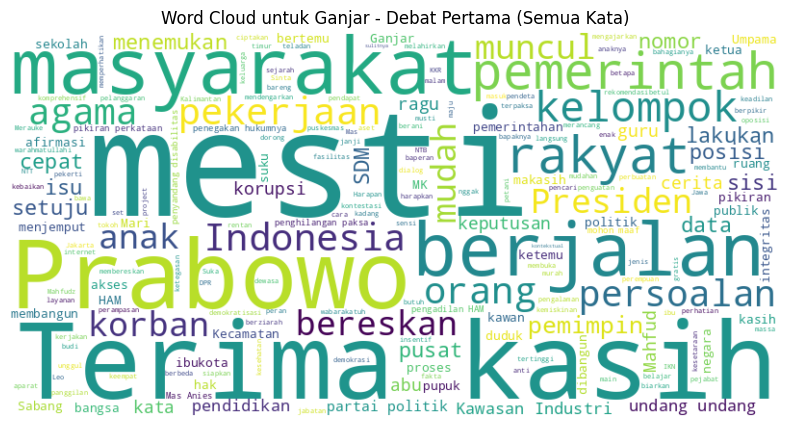

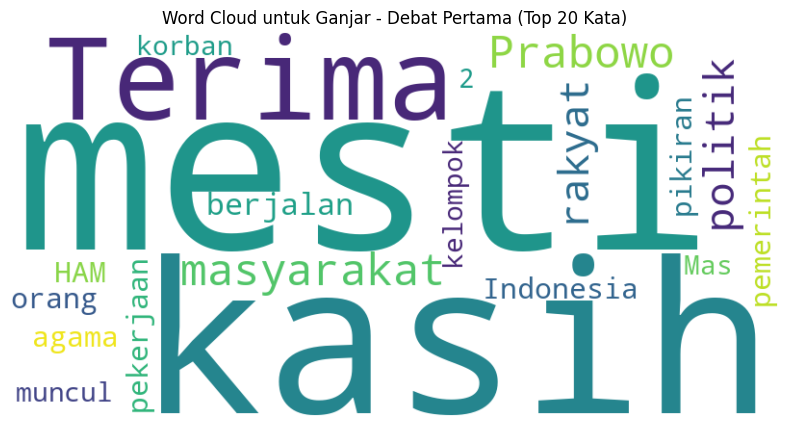

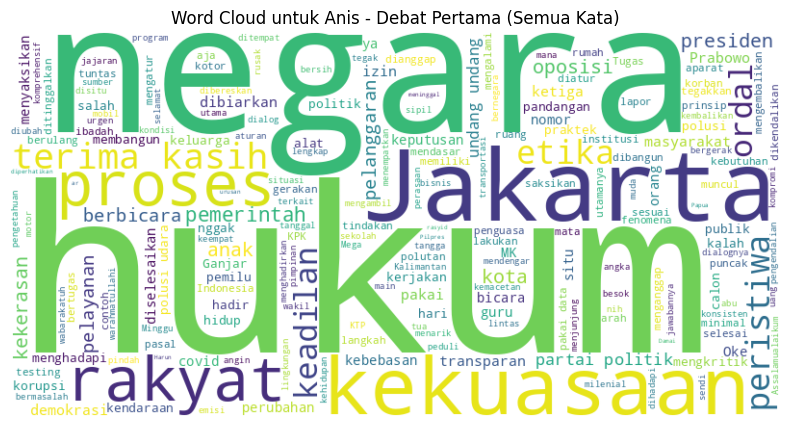

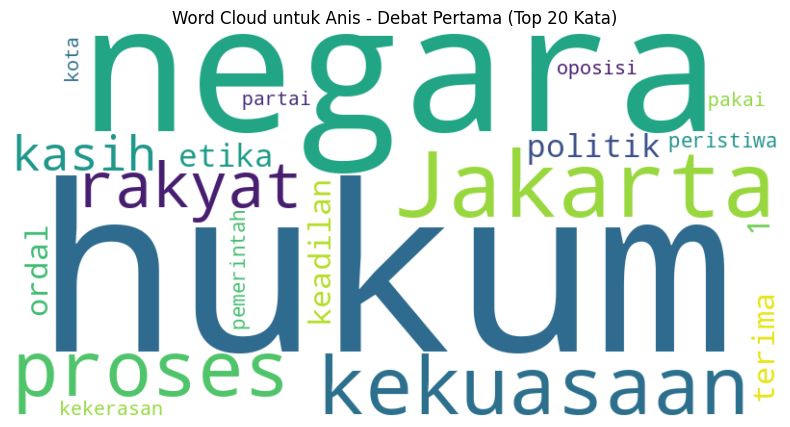

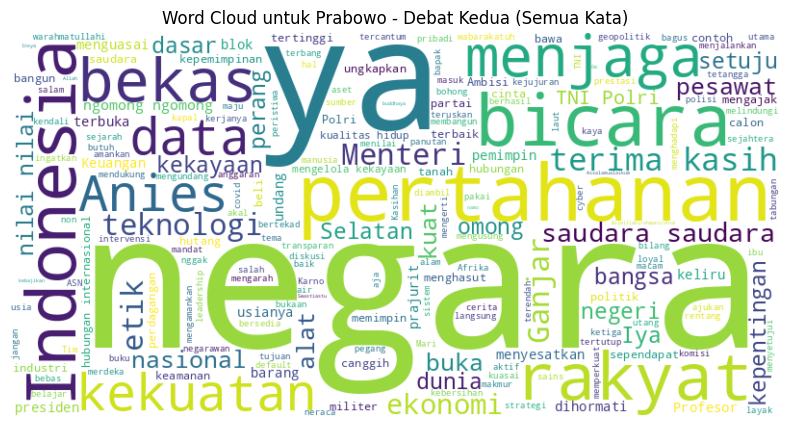

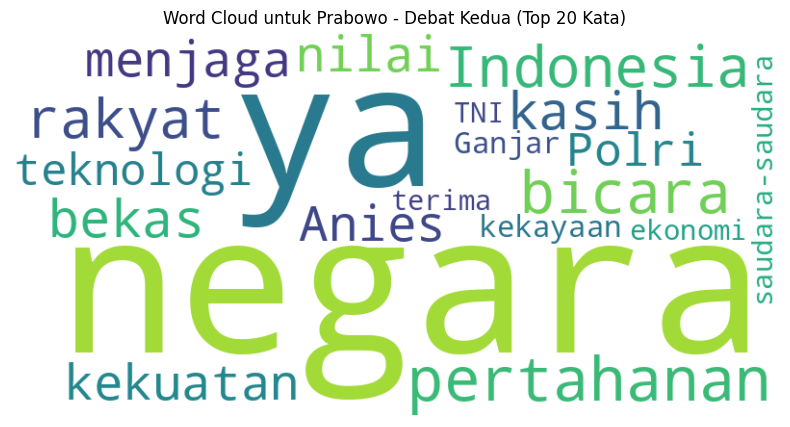

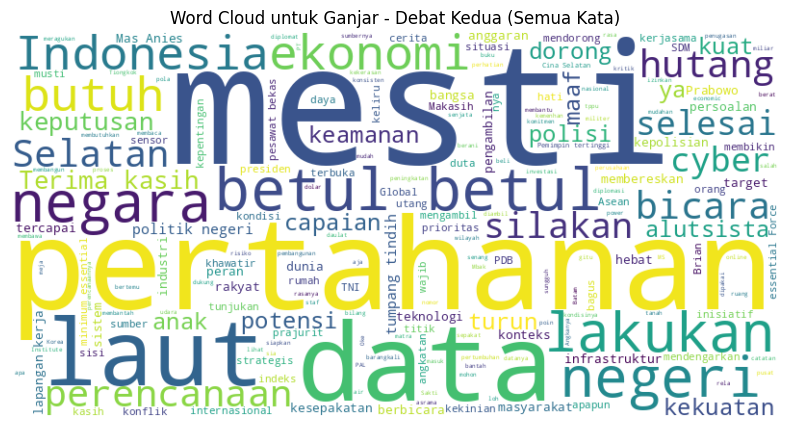

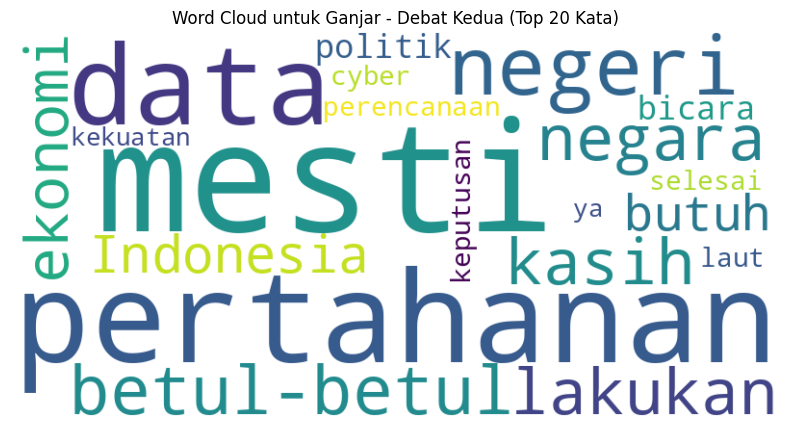

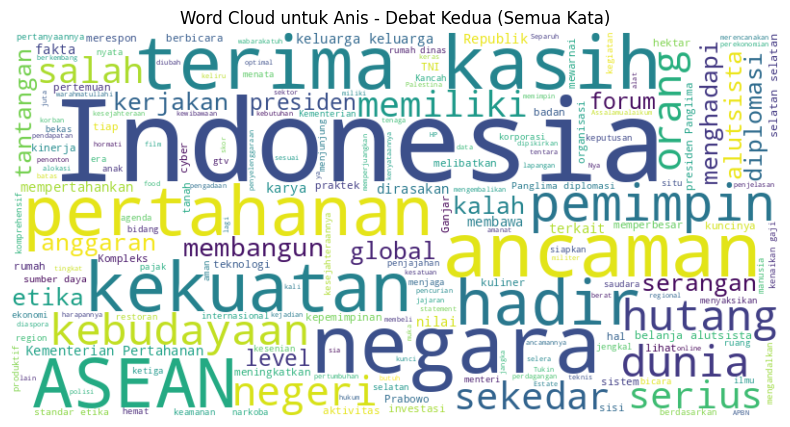

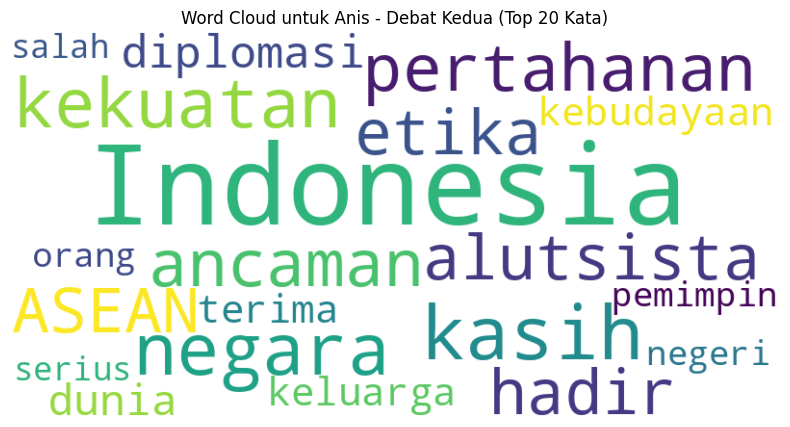

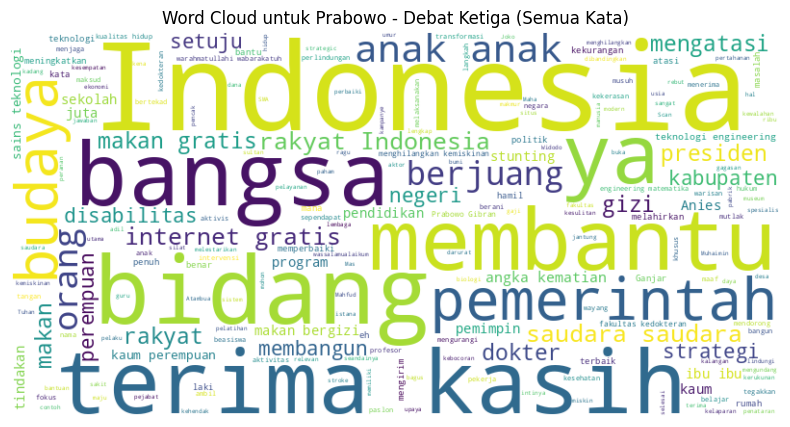

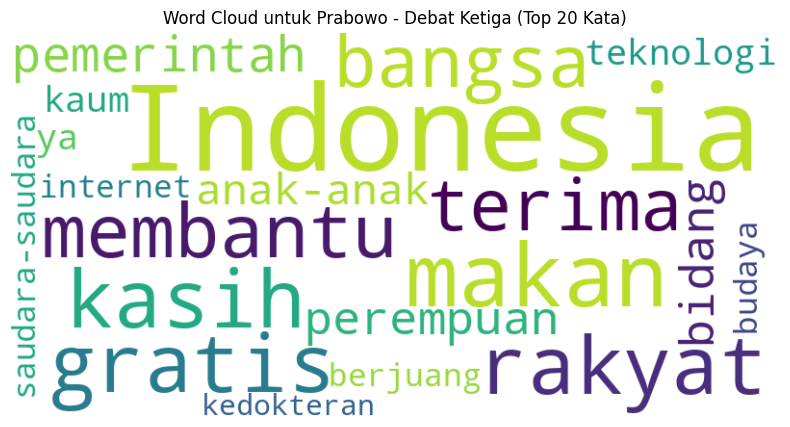

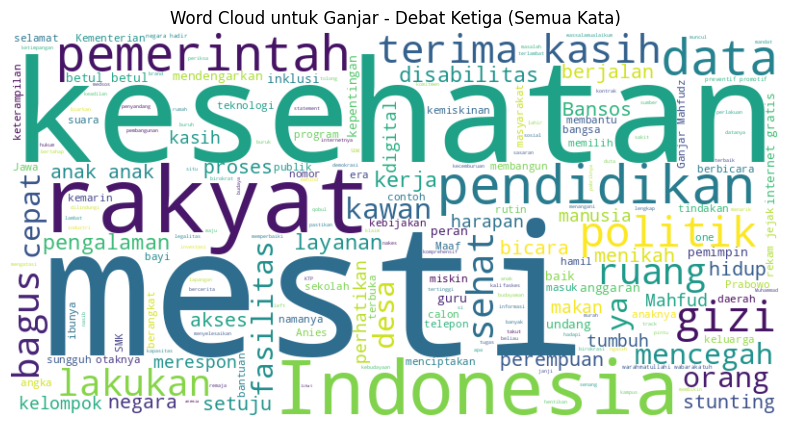

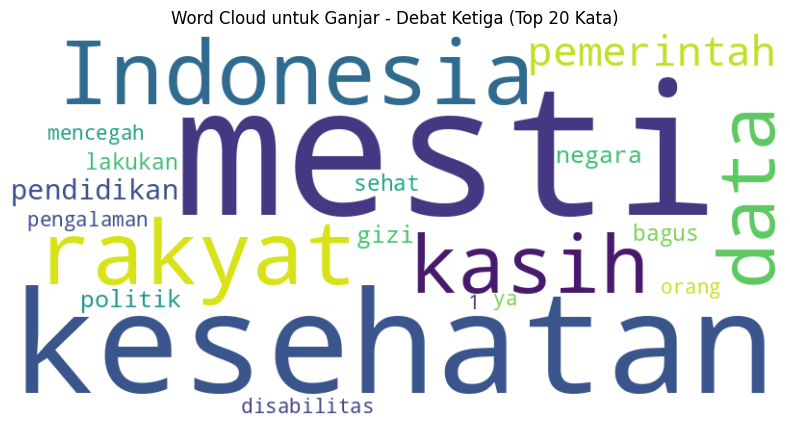

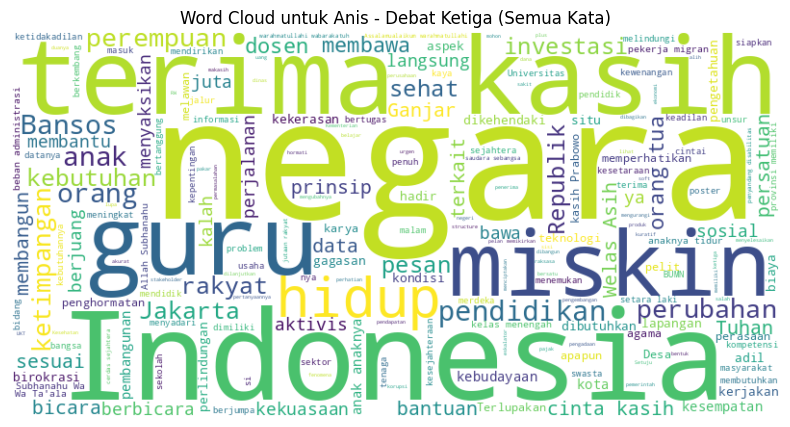

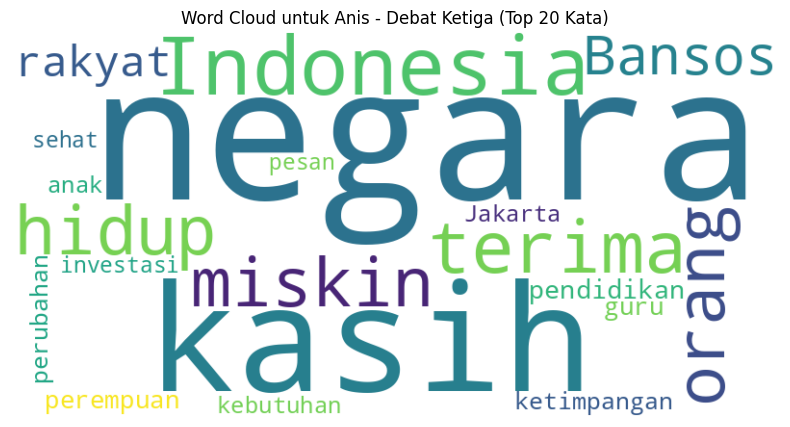

In [ ]:
# Daftar debat
debates = ['Debat Pertama', 'Debat Kedua', 'Debat Ketiga']

# Daftar kandidat
kandidat = ['Prabowo', 'Ganjar', 'Anis']

# Loop melalui setiap debat dan kandidat
for debat in debates:
    for calon in kandidat:
        file_kandidat = os.path.join(transcrip_root, debat, f'{calon}.txt')

        # Cek apakah file ada
        if os.path.exists(file_kandidat):
            with open(file_kandidat, 'r', encoding='utf-8') as f:
                teks = f.read()

            # Buat word cloud untuk semua kata
            buat_wordcloud(teks, f'Word Cloud untuk {calon} - {debat} (Semua Kata)', semua_kata=True)

            # Buat word cloud untuk 20 kata teratas
            buat_wordcloud(teks, f'Word Cloud untuk {calon} - {debat} (Top 20 Kata)', semua_kata=False)
        else:
            print(f'File tidak ditemukan: {file_kandidat}')

# **UJI COHERENCE**

In [ ]:
!pip install gdown

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import gdown
import os
from gensim import corpora
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## ChatGPT

### Prabowo Debat Pertama

In [ ]:
documents = [
    ["pemerintah", "presiden", "jokowi", "gubernur", "apbd", "hukum", "kehakiman", "yudikatif", "kpk", "undang-undang", "kekuasaan", "demokrasi", "keadilan", "penegakan", "pemimpin", "gubernur", "keadilan", "keputusan", "prabowo", "kementerian", "korupsi", "pengadilan", "mahkamah"],
    ["ekonomi", "pertumbuhan", "pembangunan", "investasi", "proyek", "mandiri", "penduduk", "apbd", "pembangunan", "perbaikan", "peluang", "mitigasi", "kerja", "digital", "prestasi", "pelayanan", "masyarakat"],
    ["masyarakat", "budaya", "agama", "persatuan", "perdamaian", "rakyat", "kelompok", "agama", "budaya", "ham", "persatuan", "kerukunan", "kesatuan", "demokrasi", "etnis", "minoritas", "saudara-saudara", "perdamaian", "kesetaraan", "perlindungan", "dialog", "persatuan", "kebajikan", "etika", "kearifan"],
    ["keamanan", "perang", "intervensi", "militer", "korupsi", "hukum", "kekuatan", "teroris", "aparat", "senjata", "polisi", "kekuatan-kekuatan", "terorisme", "pemberantasan", "tindakan", "ancaman"],
    ["lingkungan", "polusi", "alam", "kesehatan", "kesejahteraan", "masyarakat", "air", "lapangan", "pekerjaan", "kemiskinan", "perubahan", "mitigasi", "pemberdayaan", "kesehatan", "pelayanan", "kesejahteraan", "keluhan", "tanggapan", "pelayanan", "hidup", "kemiskinan"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["pemerintahan", "kepemimpinan", "kekuasaan", "hukum", "negara"] if word in dictionary.token2id],  # Cluster 1 : Pemerintahan dan Kepemimpinan
    [dictionary.token2id.get(word) for word in ["ekonomi", "pembangunan", "kemajuan", "rencana", "investasi"] if word in dictionary.token2id],  # Cluster 2 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ["sosial", "budaya", "masyarakat", "persatuan", "agama"] if word in dictionary.token2id],  # Cluster 3 : Sosial dan Budaya
    [dictionary.token2id.get(word) for word in ["keamanan", "pertahanan", "teroris", "tindakan", "hukum"] if word in dictionary.token2id],  # Cluster 4 : Keamanan dan Pertahanan
    [dictionary.token2id.get(word) for word in ["lingkungan", "kesejahteraan", "alam", "sosial", "kesehatan"] if word in dictionary.token2id]  # Cluster 5 : Lingkungan dan Kesejahteraan
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()


Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 0.964
c_uci: 0.865
c_npmi: 0.355

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 2.753
c_npmi: 0.763

Cluster 3 Coherence Scores:
u_mass: -0.366
c_v: 0.927
c_uci: 1.482
c_npmi: 0.439

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 0.979
c_uci: -2.036
c_npmi: 0.273

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.818
c_npmi: 0.593



### Ganjar Debat Pertama

In [ ]:
documents = [
    ["prabowo", "politik", "rakyat", "pemerintahan", "presiden", "undang-undang", "demokrasi", "pemilu", "dpr", "pemimpin"],
    ["masyarakat", "ham", "korban", "kelompok", "disabilitas", "pendidikan", "kesehatan", "sekolah", "layanan", "afirmasi"],
    ["pekerjaan", "industri", "sdm", "insentif", "data", "keputusan", "pembangunan", "proyek", "investasi", "pemerintah"],
    ["agama", "integritas", "bangsa", "suku", "pekerti", "budi", "budaya", "ibukota", "sejarah", "moderasi"],
    ["teknologi", "industri", "aplikasi", "inovasi", "2045", "apps", "rekrutmen", "startup", "digitalisasi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["pemerintahan", "pemimpin", "partai", "korupsi", "hukum"] if word in dictionary.token2id],  # Cluster 1 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["masyarakat", "ham", "kesehatan", "pendidikan", "disabilitas"] if word in dictionary.token2id],  # Cluster 2 : Masyarakat dan Sosial
    [dictionary.token2id.get(word) for word in ["ekonomi", "pembangunan", "industri", "data", "keputusan"] if word in dictionary.token2id],  # Cluster 3 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ["agama", "kebudayaan", "bangsa", "integritas", "suku"] if word in dictionary.token2id],  # Cluster 4 : Kebudayaan dan Keberagaman
    [dictionary.token2id.get(word) for word in ["teknologi", "masa depan", "inovasi", "industri", "progres"] if word in dictionary.token2id]  # Cluster 5 : Teknologi dan Masadepan
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()


Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: -0.231
c_v: 0.979
c_uci: 1.263
c_npmi: 0.785

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 0.971
c_uci: 1.147
c_npmi: 0.713



### Anies Debat Pertama

In [ ]:
documents = [
    ["hukum", "negara", "jakarta", "kekuasaan", "politik", "keadilan", "presiden", "partai", "pemerintahan", "demokrasi", "oposisi", "pemilu", "asn", "dpr", "keputusan", "peraturan", "transparansi"],
    ["rakyat", "masyarakat", "kasih", "keluarga", "anak-anak", "kebebasan", "pelayanan", "partisipasi", "gerakan", "dialog", "pengacara", "bantuan", "isu-isu", "sosial"],
    ["ekonomi", "bisnis", "anggaran", "investasi", "pembiayaan", "biaya", "pasar", "pengeluaran", "pendapatan", "sumber", "daya", "produksi", "transaksi", "perdagangan"],
    ["lingkungan", "polusi", "kesehatan", "masalah", "bencana", "mitigasi", "sanitasi", "kesejahteraan", "ruang", "udara", "penyelidikan", "pengelolaan"],
    ["teknologi", "inovasi", "aplikasi", "digital", "online", "sistem", "platform", "penelitian", "data", "pengembangan", "pemrograman", "otomatisasi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["kekuasaan", "demokrasi", "keadilan", "transparansi", "pemilu"] if word in dictionary.token2id],  # Cluster 1 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["masyarakat", "sosial", "kesehatan", "pendidikan", "pelayanan"] if word in dictionary.token2id],  # Cluster 2 : Sosial dan Masyarakat
    [dictionary.token2id.get(word) for word in ["ekonomi", "investasi", "pasar", "pendapatan", "produksi"] if word in dictionary.token2id],  # Cluster 3 : Ekonomi dan Bisnis
    [dictionary.token2id.get(word) for word in ["kesehatan", "polusi", "mitigasi", "sanitasi", "pengelolaan"] if word in dictionary.token2id],  # Cluster 4 : Lingkungan dan Kesehatan
    [dictionary.token2id.get(word) for word in ["inovasi", "digital", "aplikasi", "data", "otomatisasi"] if word in dictionary.token2id]  # Cluster 5 : Teknologi dan Inovasi
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: -3.740
c_npmi: 0.285

Cluster 2 Coherence Scores:
u_mass: -13.011
c_v: 0.502
c_uci: -14.577
c_npmi: -0.361

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: -0.868
c_npmi: 0.551

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 2.442
c_npmi: 0.912

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: -0.372
c_npmi: 0.665



### Prabowo Debat Kedua

In [ ]:
documents = [
    ["negara", "indonesia", "rakyat", "presiden", "tni", "menteri", "ganjar", "anies", "polri", "korupsi", "kebijakan"],
    ["keuntungan", "utang", "keuangan", "ekonomi", "pajak", "anggaran", "surplus", "investasi", "aset", "pengelolaan"],
    ["rakyat", "kesejahteraan", "kerukunan", "kasih", "kerjasama", "komunitas", "sosial", "keluarga", "pekerjaan"],
    ["teknologi", "inovasi", "industri", "sains", "perangkat", "canggih", "efisiensi", "digital", "sistem", "software"],
    ["pertahanan", "militer", "keamanan", "polisi", "tni", "strategis", "ancaman", "intelijen"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["politik", "pemerintahan", "korupsi", "kepemimpinan", "kebijakan"] if word in dictionary.token2id],  # Cluster 1 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["ekonomi", "keuangan", "investasi", "utang", "pajak"] if word in dictionary.token2id],  # Cluster 2 : Ekonomi dan Keuangan
    [dictionary.token2id.get(word) for word in ["sosial", "kesejahteraan", "komunitas", "keluarga", "kerukunan"] if word in dictionary.token2id],  # Cluster 3 : Sosial dan Kesejahteraan
    [dictionary.token2id.get(word) for word in ["teknologi", "inovasi", "efisiensi", "digital", "sistem"] if word in dictionary.token2id],  # Cluster 4 : Teknologi dan Inovasi
    [dictionary.token2id.get(word) for word in ["pertahanan", "keamanan", "militer", "strategis", "ancaman"] if word in dictionary.token2id]  # Cluster 5 : Pertahanan dan Keamanan
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.099
c_npmi: 0.613

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000



### Ganjar Debat Kedua

In [ ]:
documents = [
    ["mesti", "perhatian", "pertahanan", "negara", "militer", "keamanan", "alutsista", "penguatan", "senjata", "cyber"],
    ["data", "ekonomi", "investasi", "anggaran", "pdb", "program", "analisis", "dukungan", "sdm", "teknologi"],
    ["dpr", "politik", "peran", "kebijakan", "negara", "pemimpin", "pemilu", "keputusan", "pemerintah", "masyarakat"],
    ["pendidikan", "perhatian", "kolaborasi", "pemahaman", "pembelajaran", "budaya", "kemampuan", "inisiatif", "fasilitas", "dukungan"],
    ["teknologi", "inovasi", "pengembangan", "digitalisasi", "internet", "strategi", "riset", "produk", "efisiensi", "modernisasi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["keamanan", "pertahanan", "alutsista", "senjata", "cyber"] if word in dictionary.token2id],  # Cluster 1 : Keamanan dan Pertahanan
    [dictionary.token2id.get(word) for word in ["ekonomi", "data", "investasi", "anggaran", "pdb"] if word in dictionary.token2id],  # Cluster 2 : Ekonomi dan Data
    [dictionary.token2id.get(word) for word in ["politik", "pemerintahan", "kebijakan", "pemilu", "keputusan"] if word in dictionary.token2id],  # Cluster 3 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["pendidikan", "kesadaran", "kolaborasi", "budaya", "inisiatif"] if word in dictionary.token2id],  # Cluster 4 : Pendidikan dan Kesadaran Masyarakat
    [dictionary.token2id.get(word) for word in ["inovasi", "teknologi", "digitalisasi", "riset", "produk"] if word in dictionary.token2id]  # Cluster 5 : Inovasi dan Teknologi
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: -0.208
c_v: 0.984
c_uci: 1.332
c_npmi: 0.828



### Anies Debat Kedua

In [ ]:
documents = [
    ["indonesia", "pertahanan", "ancaman", "kekuatan", "alutsista", "tni", "kementerian", "keamanan", "serangan", "presiden", "militer"],
    ["teknologi", "inovasi", "digital", "pengembangan", "kreativitas", "etika", "komputer", "hacking"],
    ["keluarga", "masyarakat", "anak-anak", "pemimpin", "kegiatan", "belanja", "tradisional", "pendidikan"],
    ["ekonomi", "investasi", "anggaran", "pajak", "belanja", "alokasi", "pendapatan"],
    ["presiden", "diplomasi", "asean", "pemilu", "perundangan", "organisasi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["keamanan", "pertahanan", "militer", "alutsista", "ancaman"] if word in dictionary.token2id],  # Cluster 1 : Keamanan dan Pertahanan
    [dictionary.token2id.get(word) for word in ["teknologi", "inovasi", "digital", "kreativitas", "etika"] if word in dictionary.token2id],  # Cluster 2 : Teknologi dan Inovasi
    [dictionary.token2id.get(word) for word in ["keluarga", "masyarakat", "anak-anak", "pendidikan", "kegiatan"] if word in dictionary.token2id],  # Cluster 3 : Sosial dan Keluarga
    [dictionary.token2id.get(word) for word in ["ekonomi", "investasi", "anggaran", "pajak", "pendapatan"] if word in dictionary.token2id],  # Cluster 4 : Ekonomi dan Kebijakan
    [dictionary.token2id.get(word) for word in ["politik", "diplomasi", "pemilu", "perundangan", "organisasi"] if word in dictionary.token2id]  # Cluster 5 : Politik dan Diplomasi
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.099
c_npmi: 0.845

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.792
c_npmi: 1.000



### Prabowo Debat Ketiga

In [ ]:
documents = [
    ["gizi", "dokter", "kesehatan", "stunting", "penyakit", "memikirkan", "mencegah", "menyelamatkan", "mengatasi", "perbaiki", "hidup", "imunitas"],
    ["pendidikan", "mahasiswa", "sekolah", "universitas", "fakultas", "kreativitas", "mendidik", "membantu", "belajar", "mental", "inovasi"],
    ["presiden", "pemerintah", "menteri", "kebijakan", "politik", "partai", "pemimpin", "proaktif", "berjuang", "peran", "suara"],
    ["ekonomi", "pembangunan", "bantuan", "investasi", "pertumbuhan", "industri", "program", "alokasi", "kreativitas", "berkelanjutan"],
    ["budaya", "masyarakat", "kaum", "hak", "inklusi", "kerukunan", "peranan", "kepemudaan", "migran", "tradisi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["kesehatan", "nutrisi", "penyakit", "pencegahan", "imunitas"] if word in dictionary.token2id],  # Cluster 1 : Kesehatan dan Gizi
    [dictionary.token2id.get(word) for word in ["pendidikan", "akademik", "kreativitas", "pemberdayaan", "inovasi"] if word in dictionary.token2id],  # Cluster 2 : Pendidikan dan Pemberdayaan
    [dictionary.token2id.get(word) for word in ["pemerintahan", "kebijakan", "politik", "kepemimpinan", "perjuangan"] if word in dictionary.token2id],  # Cluster 3 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["ekonomi", "pembangunan", "investasi", "industri", "pertumbuhan"] if word in dictionary.token2id],  # Cluster 4 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ["budaya", "inklusi", "kerukunan", "hak", "tradisi"] if word in dictionary.token2id]  # Cluster 5 : Sosial dan Budaya
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.099
c_npmi: 0.667

Cluster 2 Coherence Scores:
u_mass: -0.231
c_v: 0.971
c_uci: -7.013
c_npmi: 0.053

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.504
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 2.197
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 2.197
c_npmi: 1.000



### Ganjar Debat Ketiga

In [ ]:
documents = [
    ["kesehatan", "rakyat", "kasih", "gizi", "sehat", "stunting", "disabilitas", "sosial", "perlindungan", "fasilitas"],
    ["pendidikan", "anak", "mahasiswa", "keterampilan", "pendidik", "pengajaran", "kurikulum", "bimbingan", "desa"],
    ["politik", "pemerintah", "demokrasi", "negara", "capres", "pemimpin", "anggaran", "kebijakan", "pemangku"],
    ["pekerja", "investasi", "ekonomi", "pengembangan", "umkm", "keluarga", "pembangunan", "masyarakat", "kerja"],
    ["teknologi", "digital", "informasi", "media", "aplikasi", "digitalisasi", "transformasi", "infrastruktur", "platform"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["kesehatan", "gizi", "stunting", "perlindungan", "fasilitas"] if word in dictionary.token2id],  # Cluster 1 : Kesehatan dan Kesejahteraan
    [dictionary.token2id.get(word) for word in ["pendidikan", "keterampilan", "pengajaran", "bimbingan", "desa"] if word in dictionary.token2id],  # Cluster 2 : Pendidikan dan Pengembangan Sumber Daya
    [dictionary.token2id.get(word) for word in ["politik", "demokrasi", "kebijakan", "kepemimpinan", "anggaran"] if word in dictionary.token2id],  # Cluster 3 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["ekonomi", "umkm", "pekerja", "investasi", "pengembangan"] if word in dictionary.token2id],  # Cluster 4 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ["teknologi", "digitalisasi", "transformasi", "infrastruktur", "platform"] if word in dictionary.token2id]  # Cluster 5 : Teknologi dan Inovasi
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000



### Anies Debat Ketiga

In [ ]:
documents = [
    ["kesehatan", "mengurangi", "perhatian", "terima", "mengatasi", "hidup", "miskin", "bantuan", "kuratif", "preventif", "penyakit", "gizi", "imunitas", "rumah", "medis"],
    ["pendidikan", "guru", "mahasiswa", "sekolah", "universitas", "kreatifitas", "membantu", "belajar", "mental", "inovasi", "dosen", "pengajar", "kelas", "kompetensi"],
    ["presiden", "pemerintah", "menteri", "kebijakan", "politik", "partai", "pemimpin", "suara", "rakyat", "bansos", "anggaran", "program", "daerah", "asn", "lembaga", "keamanan"],
    ["ekonomi", "investasi", "pembangunan", "bantuan", "industri", "pertumbuhan", "program", "alokasi", "bumn", "pengembangan", "pengeluaran", "biaya", "daerah", "kebutuhan"],
    ["masyarakat", "budaya", "kaum", "hak", "inklusi", "kerukunan", "tradisi", "perempuan", "migran", "sejahtera", "sosial", "komunitas", "kearifan", "keragaman"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["kesehatan", "pencegahan", "gizi", "pelayanan", "kesejahteraan"] if word in dictionary.token2id],  # Cluster 1 : Kesehatan dan Gizi
    [dictionary.token2id.get(word) for word in ["pendidikan", "pemberdayaan", "inovasi", "keterampilan", "kompetensi"] if word in dictionary.token2id],  # Cluster 2 : Pendidikan dan Pemberdayaan
    [dictionary.token2id.get(word) for word in ["kebijakan", "kepemimpinan", "partai", "anggaran"] if word in dictionary.token2id],  # Cluster 3 : Politik dan Pemerintahan
    [dictionary.token2id.get(word) for word in ["ekonomi", "pembangunan", "industri", "program", "anggaran"] if word in dictionary.token2id],  # Cluster 4 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ["pertumbuhan", "investasi", "pengembangan", "biaya", "sosial"] if word in dictionary.token2id]  # Cluster 5 : Sosial dan Budaya
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: -22.353
c_npmi: -0.809

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: -5.840
c_npmi: 0.092

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.384
c_npmi: 0.714

Cluster 4 Coherence Scores:
u_mass: -7.876
c_v: 0.607
c_uci: -6.137
c_npmi: 0.125

Cluster 5 Coherence Scores:
u_mass: -10.409
c_v: 0.601
c_uci: -10.857
c_npmi: -0.039



## Gemini

### Prabowo Debat Pertama

In [ ]:
documents = [
    ["prabowo", "partai", "pemerintah", "presiden", "rakyat", "hukum", "undang-undang", "demokrasi", "keadilan", "korupsi"],
    ["siswa", "belajar", "mengajar", "mahasiswa", "keluarga", "pemuda", "social", "budaya", "kemiskinan", "kesejahteraan"],
    ["korban", "hak", "kasus", "pidana", "peradilan", "tersangka", "saksi", "putusan", "vonis", "penjara"],
    ["industri", "bisnis", "investasi", "pertumbuhan", "infrastruktur", "sumber daya", "tenaga kerja", "kemiskinan", "pertanian", "perkotaan"],
    ["orang", "kata", "waktu", "tempat", "hal"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id[word] for word in ["politik", "pemerintahan", "negara", "pemimpin", "rakyat"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id[word] for word in ["prabowo", "siswa", "keluarga", "pemuda", "social"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id[word] for word in ["hukum", "keadilan", "pidana", "peradilan", "vonis"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id[word] for word in ["industri", "investasi", "pembangunan", "bisnis", "pertanian"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id[word] for word in ["orang", "kata", "waktu", "tempat", "hal"] if word in dictionary.token2id]  # Cluster 5
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan

Cluster 2 Coherence Scores:
u_mass: -10.409
c_v: 0.601
c_uci: -8.799
c_npmi: 0.247

Cluster 3 Coherence Scores:
u_mass: -15.613
c_v: 0.209
c_uci: -14.004
c_npmi: -0.130

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



### Ganjar Debat Pertama

In [ ]:
documents = [
    ["presiden", "partai", "rakyat", "undang-undang", "demokrasi", "oposisi", "pemilu", "kekuasaan", "keadilan", "korupsi"],
    ["kasus", "pidana", "tersangka", "saksi", "putusan", "vonis", "penjara", "hukum", "keadilan", "pelanggaran"],
    ["rakyat", "keluarga", "pemuda", "sosial", "budaya", "kemiskinan", "kesejahteraan", "pendidikan", "agama", "nilai"],
    ["sampah", "limbah", "hutan", "energi", "iklim", "perubahan iklim", "lingkungan", "udara", "air", "polusi"],
    ["orang", "kata", "waktu", "tempat", "hal"]
]



stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ['politik', 'pemerintahan', 'negara', 'kekuasaan', 'hukum'] if word in dictionary.token2id],  # Cluster 1 : Pemerintahan dan Kepemimpinan
    [dictionary.token2id.get(word) for word in ['hukum', 'keadilan', 'pelanggaran', 'pengadilan', 'penegakan'] if word in dictionary.token2id],  # Cluster 2 : Ekonomi dan Pembangunan
    [dictionary.token2id.get(word) for word in ['masyarakat', 'orang', 'kehidupan', 'sosial', 'budaya'] if word in dictionary.token2id],  # Cluster 3 : Sosial dan Budaya
    [dictionary.token2id.get(word) for word in ['lingkungan', 'alam', 'udara', 'air', 'polusi', "kesejahteraan"] if word in dictionary.token2id],  # Cluster 4 : Keamanan dan Pertahanan
    [dictionary.token2id.get(word) for word in ["orang", "kata", "waktu", "tempat", "hal"] if word in dictionary.token2id]  # Cluster 5 : Lingkungan dan Kesejahteraan
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: -26.022
c_v: 0.062
c_uci: -24.412
c_npmi: -0.884

Cluster 2 Coherence Scores:
u_mass: -0.231
c_v: 0.971
c_uci: 1.147
c_npmi: 0.713

Cluster 3 Coherence Scores:
u_mass: -17.348
c_v: 0.338
c_uci: -15.738
c_npmi: -0.256

Cluster 4 Coherence Scores:
u_mass: -10.409
c_v: 0.601
c_uci: -8.799
c_npmi: 0.247

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



### Anies Debat Pertama

In [ ]:
documents = [
    ["hukum", "keadilan", "pengadilan", "pelanggaran", "hukuman", "korupsi", "kriminal", "penegakan", "hakim", "tersangka"],
    ["politik", "pemerintah", "negara", "demokrasi", "partai", "presiden", "pemilu", "kekuasaan", "kebijakan", "oposisi"],
    ["masyarakat", "rakyat", "orang", "kehidupan", "keluarga", "sosial", "budaya", "agama", "pendidikan", "kesehatan"],
    ["proses", "peristiwa", "tindakan", "terjadi", "perubahan", "keputusan", "hasil", "kasus", "masalah", "situasi"],
    ["Jakarta", "kota", "negara", "rumah", "ruang", "jalan", "daerah", "tempat", "lokasi", "lingkungan"]
]



stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["hukum", "keadilan", "penegakan"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id.get(word) for word in ["politik", "pemerintahan", "demokrasi"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id.get(word) for word in ["masyarakat", "sosial", "kehidupan"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id.get(word) for word in ["proses", "peristiwa", "tindakan"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id.get(word) for word in ["orang", "kata", "waktu", "tempat", "hal"] if word in dictionary.token2id]  # Cluster 5
]

print("Topics", topics)

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Topics [[1, 3, 7], [18, 10], [25, 29, 22], [34, 32, 36], [26]]
Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



###Prabowo Debat Kedua

In [ ]:
documents = [
    ["negara", "indonesia", "rakyat", "pertahanan", "tni", "polri", "anies", "ganjar", "berbicara", "terima"],
    ["nilai", "kasih", "kekuatan", "kekayaan", "saudara"],
    ["ekonomi", "teknologi", "kekayaan"],
    ["bekas", "menjaga"],
    ["ya"]
]

processed_docs = documents

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id[word] for word in ["negara", "pemerintah", "kekuasaan", "rakyat", "keamanan"] if word in dictionary.token2id],  # Cluster 1 : Pemerintahan dan Kepemimpinan
    [dictionary.token2id[word] for word in ["nilai", "moral", "kemanusiaan", "sosial", "agama"] if word in dictionary.token2id],  # Cluster 2 : Ekonomi dan Pembangunan
    [dictionary.token2id[word] for word in ["ekonomi", "pembangunan", "teknologi", "kekayaan"] if word in dictionary.token2id],  # Cluster 3 : Sosial dan Budaya
    [dictionary.token2id[word] for word in ["keadaan", "kondisi", "peristiwa", "waktu"] if word in dictionary.token2id],  # Cluster 4 : Keamanan dan Pertahanan
    [dictionary.token2id[word] for word in ["ya"] if word in dictionary.token2id]  # Cluster 5 : Lingkungan dan Kesejahteraan
]


def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

for i, cluster in enumerate(topics):
    if not cluster:
        print(f"Cluster {i+1} kosong, tidak dihitung.")
        continue

    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
c_v: 1.000
c_uci: nan
c_npmi: nan

Cluster 3 Coherence Scores:
c_v: 0.971
c_uci: 1.147
c_npmi: 0.713

Cluster 4 kosong, tidak dihitung.
Cluster 5 Coherence Scores:
c_v: 1.000
c_uci: nan
c_npmi: nan



###Ganjar Debat Kedua

In [ ]:
documents = [
    ["negara", "indonesia", "rakyat", "pertahanan", "militer", "keamanan", "cyber"],
    ["ekonomi", "pembangunan", "teknologi", "data", "perencanaan", "kekayaan"],
    ["keadaan", "kondisi", "waktu", "perasaan", "hubungan"],
    ["laut", "negara", "wilayah", "pertahanan"],
    ["masyarakat", "nilai", "hubungan", "sosial"]
]

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

topics = [
    ["keamanan", "pertahanan", "militer", "negara", "cyber"],  # Cluster 1
    ["ekonomi", "pembangunan", "perencanaan", "data"],         # Cluster 2
    ["kondisi", "keadaan", "waktu", "perasaan"],               # Cluster 3
    ["negara", "laut", "wilayah"],                             # Cluster 4
    ["masyarakat", "nilai", "hubungan"]                        # Cluster 5
]

valid_topics = [cluster for cluster in topics if len(cluster) > 0]

methods = ['c_v', 'c_uci', 'c_npmi']

def compute_coherence(topics, documents, dictionary, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

for i, cluster in enumerate(valid_topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        try:
            score = compute_coherence([cluster], documents, dictionary, method)
            scores[method] = score
        except ValueError as e:
            scores[method] = "Error"
    for method, score in scores.items():
        print(f"{method}: {score:.3f}" if isinstance(score, float) else f"{method}: {score}")
    print()

Cluster 1 Coherence Scores:
c_v: 0.967
c_uci: 1.124
c_npmi: 0.742

Cluster 2 Coherence Scores:
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
c_v: 0.971
c_uci: 1.147
c_npmi: 0.713

Cluster 5 Coherence Scores:
c_v: 0.971
c_uci: 1.147
c_npmi: 0.713



###Anies Debat Kedua

In [ ]:
documents = [
    ["indonesia", "asean", "pertahanan", "diplomasi", "ancaman", "alutsista", "negeri", "negara", "kekuatan", "serius"],
    ["kasih", "budaya", "keluarga", "orang", "etika", "terima", "hadir", "salah"],
    ["pemimpin", "negara", "kekuatan", "serius", "salah"],
    ["hadir", "serius"],
    ["dunia"]
]


stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["indonesia", "asean", "pertahanan", "diplomasi", "ancaman"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id.get(word) for word in ["budaya", "kasih", "etika", "keluarga", "orang"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id.get(word) for word in ["pemimpin", "negara", "kekuasaan", "politik"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id.get(word) for word in ["hadir", "serius"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id.get(word) for word in ["dunia"] if word in dictionary.token2id]  # Cluster 5
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 0.964
c_uci: 0.916
c_npmi: 0.569

Cluster 4 Coherence Scores:
u_mass: -0.693
c_v: 0.623
c_uci: -0.182
c_npmi: -0.113

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



### Prabowo Debat Ketiga

In [ ]:
documents = [
    ["saudara-saudara", "ibu-ibu", "anak-anak", "kaum", "warga", "desa", "keluarga", "sosial", "budaya", "kemasyarakatan"],
    ["presiden", "partai", "rakyat", "undang-undang", "demokrasi", "oposisi", "pemilu", "kekuasaan", "keadilan", "korupsi"],
    ["guru", "murid", "belajar", "mengajar", "sakit", "rumah sakit", "medis", "kesehatan", "pendidikan", "ilmu pengetahuan"],
    ["pekerjaan", "gaji", "pendapatan", "ekonomi", "pembangunan", "investasi", "pertumbuhan", "infrastruktur", "sumber daya", "tenaga kerja"],
    ["kata", "angka", "waktu", "tempat", "hal"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["masyarakat", "rakyat", "keluarga", "anak", "perempuan"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id.get(word) for word in ["politik", "pemerintahan", "negara", "kekuasaan", "hukum"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id.get(word) for word in ["pendidikan", "kesehatan", "dokter", "sekolah", "mahasiswa"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id.get(word) for word in ["ekonomi", "pembangunan", "pekerjaan", "pendapatan", "kesejahteraan"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id.get(word) for word in ["kata", "angka", "waktu", "tempat", "hal"] if word in dictionary.token2id]  # Cluster 5
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: -26.022
c_v: 0.062
c_uci: -24.412
c_npmi: -0.884

Cluster 2 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



### Ganjar Debat Ketiga

In [ ]:
documents = [
    ["kesehatan", "rakyat", "gizi", "sehat", "mencegah", "stunting", "hamil", "bayi", "anak-anak", "makanan"],
    ["pemerintah", "politik", "negara", "kebijakan", "anggaran", "program", "layanan", "peraturan", "masyarakat", "pembangunan"],
    ["pendidikan", "guru", "sekolah", "murid", "belajar", "mengajar", "mahasiswa", "kurikulum", "pembelajaran", "pengetahuan"],
    ["data", "digital", "internet", "teknologi", "informasi", "sistem", "aplikasi", "online", "website", "komputer"],
    ["masyarakat", "keluarga", "budaya", "sosial", "hidup", "manusia", "komunitas", "interaksi", "nilai", "tradisi"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["kesehatan", "rakyat", "gizi", "sehat", "stunting"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id.get(word) for word in ["pemerintah", "politik", "negara", "kebijakan", "anggaran"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id.get(word) for word in ["pendidikan", "guru", "sekolah", "murid", "belajar"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id.get(word) for word in ["data", "digital", "internet", "teknologi", "informasi"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id.get(word) for word in ["masyarakat", "keluarga", "budaya", "sosial", "hidup"] if word in dictionary.token2id]  # Cluster 5
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 5 Coherence Scores:
u_mass: -0.277
c_v: 0.984
c_uci: 1.332
c_npmi: 0.828



### Anies Debat Ketiga

In [ ]:
documents = [
    ["rakyat", "miskin", "pendidikan", "kesehatan", "kebutuhan", "hidup", "orang", "perempuan", "anak", "bansos"],
    ["negara", "indonesia", "jakarta", "pemerintah", "kebijakan", "perubahan", "investasi", "pesan"],
    ["kasih", "hidup", "orang", "perempuan", "anak", "keluarga"],
    ["ekonomi", "investasi"],
    ["perubahan"]
]

stop_words = set(stopwords.words('indonesian'))

processed_docs = [
    [word for word in doc if word not in stop_words]
    for doc in documents
]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics = [
    [dictionary.token2id.get(word) for word in ["rakyat", "miskin", "pendidikan", "kesehatan", "kebutuhan"] if word in dictionary.token2id],  # Cluster 1
    [dictionary.token2id.get(word) for word in ["negara", "indonesia", "jakarta", "pemerintah", "kebijakan"] if word in dictionary.token2id],  # Cluster 2
    [dictionary.token2id.get(word) for word in ["kasih", "hidup", "orang", "perempuan", "anak"] if word in dictionary.token2id],  # Cluster 3
    [dictionary.token2id.get(word) for word in ["ekonomi", "investasi"] if word in dictionary.token2id],  # Cluster 4
    [dictionary.token2id.get(word) for word in ["perubahan"] if word in dictionary.token2id]  # Cluster 5
]

def compute_coherence(topics, documents, dictionary, corpus, method):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=documents if method != 'u_mass' else None,
        corpus=corpus if method == 'u_mass' else None,
        dictionary=dictionary,
        coherence=method
    )
    return coherence_model.get_coherence()

methods = ['u_mass', 'c_v', 'c_uci', 'c_npmi']

for i, cluster in enumerate(topics):
    print(f"Cluster {i+1} Coherence Scores:")
    scores = {}
    for method in methods:
        score = compute_coherence([cluster], processed_docs, dictionary, corpus, method)
        scores[method] = score
    for method, score in scores.items():
        print(f"{method}: {score:.3f}")
    print()

Cluster 1 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 2 Coherence Scores:
u_mass: 0.000
c_v: 1.000
c_uci: 1.609
c_npmi: 1.000

Cluster 3 Coherence Scores:
u_mass: 0.000
c_v: 0.984
c_uci: 0.916
c_npmi: 0.828

Cluster 4 Coherence Scores:
u_mass: 0.000
c_v: 0.964
c_uci: 0.916
c_npmi: 0.569

Cluster 5 Coherence Scores:
u_mass: nan
c_v: 1.000
c_uci: nan
c_npmi: nan



## Gemini API


### Prabowo Debat Pertama

In [ ]:
clusters = [
    ["rakyat", "ya", "indonesia", "mas", "negara", "anies", "ganjar", "papua", "hukum", "kasih", "kelompok", "setuju", "perkuat", "demokrasi", "ekonomi", "dki", "situ", "saudara-saudara", "republik", "manusia", "asasi", "membela", "tegakkan", "undang-undang", "terima", "terima", "maju", "bangsa", "hak", "pemimpin", "pemerintah", "jokowi", "gubernur", "keadilan", "anak", "perbaiki", "tendensius", "republik", "orang", "keputusan", "prabowo", "teroris", "kepentingan", "intinya", "kerukunan", "anggaran", "menindas", "negara-negara", "misi", "proses", "perjuangan", "juta", "diberantas", "menyalahkan", "memperkuat", "visi", "angin", "mengeluh", "ham", "kelompok-kelompok", "melindungi", "kesatuan", "hilang", "faktor", "menegakkan", "sulit", "wakil", "pendahulu", "faktor-faktor", "persatuan", "salam", "pemerintahan", "separatisme", "gerakan", "dialog", "minoritas", "sejarah", "orang-orang", "sadar", "tertinggi", "etnis"],
    ["oposisi", "salah", "intervensi", "diintervensi", "kehakiman", "yudikatif", "independen", "perang", "kekuasaan", "kekurangan", "paham", "aman", "sorry", "kualitas", "mahkamah", "kejaksaan", "konstitusi", "korupsi", "terkendali", "dewasa", "komitmen", "diperbaiki", "menghasut", "membantu", "butuh", "dasar", "45", "adil", "aparat-aparat", "sempurna", "bersenjata", "penegakan", "kekuatan-kekuatan", "penegak", "wewenang", "pelanggaran", "ditegakkan", "menghukum"],
    ["pengalaman", "ratusan", "masyarakat", "penduduk", "perlindungan", "pelayanan", "perbaikan", "kesempatan", "kebajikan", "birokrasi", "sejahtera", "pertumbuhan", "investor", "kemajuan", "gajinya", "pupuk", "pembangunan", "kemiskinan", "kekayaan", "polusi", "mengurangi", "kerja", "hidup", "pengangguran", "kebersihan"],
    ["come", "beliau", "sesederhana", "19", "ombudsman", "diperkuat", "80", "setahun", "menempatkan", "inspektorat", "bpkp", "bpk", "mitigasi", "berkelanjutan", "bermutu", "badan-badan", "disogok", "realisasi", "mendorong", "mengembangkan", "prestasi", "mengakui", "kepolisian", "akar-akarnya", "pencerahan", "aturan", "sikap", "sependapat", "sekian", "kepemimpinan", "nya", "berpendapat", "pekerja", "digital", "mana-mana", "saudara", "data", "rekam", "ketidakpastian", "presiden", "memperbaiki", "ditangani", "dunia", "menerima", "aja", "mengerti", "berkomitmen", "terpilih", "sakit", "pertaruhkan", "rumah", "mengalami", "kedaulatan", "didasarkan", "berjalan", "mengusung", "langkah-langkah", "pendiri-pendiri", "tanah", "cinta", "kali", "makan", "memiliki", "hidupnya", "langsung", "bangun", "tua", "pendapat", "final", "merampas", "geopolitik", "bersangkutan", "didapatkan", "merit", "pendekatan", "kebaikan", "berbuat", "bener", "putuskan", "mengurus", "system", "menjamin", "terbaik", "pakar", "dipolitisasi", "contoh", "membawa", "perkembangan", "tulodo", "raya", "tanggal", "retorika", "kata-kata", "ketenangan", "keluhan", "pemikiran", "jiwa", "campur", "dirasakan", "berkhianat", "kearifan", "berdosa", "disederhanakan", "mengambil", "mengorbankan", "utamakan", "mempersulit", "14", "belah", "pecah", "luncurkan", "rakyat", "polisi", "asing", "petani-petani", "jalan", "rukun", "tangan", "keliling", "mati", "syaratnya", "ikuti", "fase", "apa-apa", "makmur", "majemuk", "nelayan", "jabatan", "melompat", "disitu", "petani", "takut", "dibangun", "rumit", "rentan", "pilih", "pondok", "patuh", "pandangan", "suka", "u", "sejuk", "arif", "on", "agama", "buddhaya", "manajemen", "berhasil", "keras"],
    ["10", "shalom", "wabarakatuh", "assalamualaikum", "bismillahirohmanirohim", "pencerahan", "muda", "mengangkat", "sumpah", "pengkhianatan", "susah", "penuh", "damai", "kerusuhan", "segi", "kuat", "jawa", "mandat", "2009", "pancasila", "hujan", "jiwa", "nyawa", "diktator", "berkuasa", "menghadapi", "tertampung", "terang", "sekolah", "mengadakan", "sungguh-sungguh", "langsung", "ideologi", "memproses", "berganti-ganti", "etika", "kaya", "tahulah", "nggak", "mendampingi", "loh", "kesejukan", "service", "tim", "culik", "mengatasi", "permainan", "cintai", "280", "lihat", "pesat", "masani", "sungguh", "ngarso", "ing", "rangkul", "lulusan-lulusan", "jangka", "munafik", "perempuan", "tanggapan", "pendek", "bersatu", "ikuti", "kemerdekaan"],
]
cluster_labels = [
    "Cluster 1: Pemerintahan & Politik Indonesia",
    "Cluster 2: Hukum & Penegakan Hukum",
    "Cluster 3: Kondisi Sosial Ekonomi",
    "Cluster 4: Kata Sapaan & Ungkapan",
    "Cluster 5: Kondisi Bangsa & Cita-cita",
]
file_txt = "/content/Prabowo.txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    coherence_model = CoherenceModel(
        topics=[cluster_ids],
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((label, score))

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pemerintahan & Politik Indonesia: 0.1518
Cluster 2: Hukum & Penegakan Hukum: 0.3338
Cluster 3: Kondisi Sosial Ekonomi: 0.4674
Cluster 4: Kata Sapaan & Ungkapan: 0.3548
Cluster 5: Kondisi Bangsa & Cita-cita: 0.4115


### Ganjar Debat Pertama

In [ ]:
clusters = [
    ["politik", "rakyat", "pemerintah", "ham", "indonesia", "prabowo", "masyarakat", "pekerjaan", "orang", "pemimpin", "presiden", "keputusan", "isu", "partai", "undang-undang", "posisi", "mahfud", "menemukan", "presiden", "pendidikan", "sdm", "hukumnya", "nomor", "data", "setuju", "mohon", "sisi", "kelompok", "korban", "muncul", "2", "bereskan", "cepat", "cerita", "korupsi", "akses", "negara", "pemerintahan", "publik", "anies", "proses", "persoalan-persoalan", "mari", "ketemu", "umpama", "sabang", "bangsa", "ketua", "menjemput", "anak", "sekolah", "1", "dibangun", "hak", "mudah", "maaf", "paksa", "penghilangan", "penegakan", "ruang", "afirmasi", "mk", "dpr", "rekomendasi", "bawa", "berbeda", "keempat", "kontestasi", "anti", "keadilan", "ragu", "pengadilan", "membereskan", "petani", "membantu", "fakta", "pencari", "berpikir", "ketegasan", "tokoh", "baperan", "kkr", "komprehensif", "kalimantan", "warahmatullahi", "wabarakatuh", "malam", "aparat", "demokrasi", "kesetaraan", "ntb", "merauke", "langsung", "internet", "pendeta", "leo", "melahirkan", "kesehatan", "belajar", "ntt", "pekerti", "budi", "ganjar", "anies", "pemimpinnya", "presiden", "pemerintah", "pemimpin", "gubernur", "menko", "pansus", "icw", "pengadilan", "pemilu", "nusakambangan", "jera", "bem", "berdemokrasi", "reformasi", "berurusan", "izinkan", "sesuai", "demokratisasi", "pengalaman", "berziarah", "mendengarkan", "dewasa", "pelanggaran", "kerjakan", "kata-kata", "perbuatan", "memperhatikan", "panggilan", "sejarah", "mahfud", "harapkan", "bapaknya", "kecamatan", "perempuan", "sinta", "butuh", "perhatian", "teladan", "dialog", "tertinggi", "betapa", "bahagianya", "nggak", "fasilitas", "maju", "unggul", "ciptakan", "biarkan", "pendapat", "industri", "insentif", "industri", "enak", "jabatan", "anaknya", "jakarta", "siapkan", "jawa", "12", "musti", "dorong", "massa", "keluarga", "kemiskinan", "kawasan", "penguatan", "merancang", "mudah-mudahan", "pejabat", "layanan", "perampasan", "terpaksa", "membuka", "aset", "murah", "masuk", "oposisi", "pusat", "makasih", "ikn", "kelompok-kelompok", "konteks", "pakai", "bangunkan", "kekinian", "andi", "badan", "komentar", "puskesmas", "batang", "putusan", "teknologi", "kawasan", "perdebatan", "27000", "stainless", "abu-abu", "libatkan", "hebat", "setara", "pelayanan", "rahayu", "suku-suku", "alih", "namo", "dayak", "mengambil", "swastiastu", "agama", "suka", "edukasi", "om", "temukan", "apps", "sejahtera", "fungsi", "super", "salam", "pikiran", "kebaikan-kebaikan", "kemajuan", "berdiri", "diperiksa", "misterius", "konsisten", "ibunya", "65", "penghormatan", "langkah", "kerjasama", "luhur", "keras", "terbayangkan", "torch", "berjalan", "panggilan", "keamanan", "pertanyaannya", "sumber", "dikeluarkan", "melky", "kader", "iklan", "terancam", "mengerti", "main-main", "perguruan", "hadirkan", "menyatukan", "contoh", "miskin", "kadang-kadang", "akomodatif", "hidup", "menurunkan", "dihentikan", "pemerintahannya", "berbicara", "tindakan", "cara-cara", "berani", "menangani", "kemarin", "pastikan", "terus-menerus", "sensi", "janji", "potensial", "vokasi", "berlarut-larut", "4", "wassalamualaikum", "hkti", "disiapkan", "adil", "dukungan", "bensin", "bisnis", "mencari", "menghasilkan", "kritikan", "kemudahan", "tahap", "model", "memutuskan", "pajak", "50", "tawarkan", "masukan", "pertumbuhan", "kilometer", "besok", "menerima", "pusat-pusat", "urusan", "pemerintahnya", "komplain", "berinvestasi", "melindungi", "simpel", "laporgub", "pergi", "putih", "menyelesaikan", "aparaturnya", "akuntabel", "mengklarifikasi", "suruh", "protes", "transparan", "anggota", "kekuatan", "paham", "kepastian", "melibatkan", "mbak", "bangun", "investasi", "manula", "kawan", "fisiknya", "poin", "anak-anak", "nagih", "merepresentasikan", "sulitnya", "klasifikasi", "janji", "relatif", "kontekstual", "coba", "buku", "pembangunan", "membongkar", "kesah", "memberantas", "perencanaan", "peran-peran", "keluh", "terima", "sepakat", "kendal", "mencoba", "bersih", "dipersatukan", "kawasan-kawasan", "terbiasa", "si", "peduli", "keunggulan", "level", "suka", "aware", "barisan", "forkopimcam", "berjuang", "pengambil", "daerah", "rapat", "kawan-kawan", "tua", "wakil", "pasangan", "bergeser", "bank", "tanggung", "momentum", "kesamaan", "muslim", "bentuk", "pegawai", "kecamatan", "bersekolah", "tunjukkan", "nasional", "mendorong", "an", "project-project", "berpangkat", "catatan", "government", "menteri", "polisi", "anggaran", "timur", "percepatan", "selesaikan", "kesulitan", "kumpulan", "dalamnya", "komoditas", "partisipasi", "triliun", "100", "menggantung", "kepentingan", "utara", "terlibat", "menunda", "bersikap", "sumatera", "mensosialisasikan", "calon", "pr", "kerugian", "tugas", "aja", "muda", "langka", "memfasilitasi", "komitmennya", "papua", "kabupaten", "provinsi", "moderasi", "equivalen"],
    ["kasih", "terima", "mesti", "orang", "kelompok", "korban", "mas", "perhatian", "butuh", "keluarga", "anaknya", "mudah-mudahan", "makasih", "kasih", "ibu", "bapak", "ibu", "ayah", "anak", "ibukota", "penyandang", "disabilitas", "ketemu", "umpama", "sabang", "bangsa", "menjemput", "mudah", "maaf", "paksa", "afirmasi", "bertemu", "integritas", "membangun", "proses", "persoalan-persoalan", "publik", "anies", "pupuk", "perkataan", "mari", "duduk", "bangun", "anak-anak", "kawan", "peduli", "berjuang", "kesamaan", "bersekolah", "muda", "tua", "menolong", "sayang", "muliakan", "melayani", "keseharian", "memahami", "dicontohkan", "bareng-bareng", "percayalah", "keseriusan", "efek", "kondisi", "terkait", "dihukum", "suku", "ikm", "tuntaskan", "semangat", "sikat", "samping", "kesempatan", "situasi", "contoh", "hidup", "menurunkan", "dihentikan", "berbicara", "terus-menerus", "sederhana", "ketangguhan", "menyandera", "bersih", "terbiasa", "tua", "bentuk", "angkat", "selesaikan", "partisipasi", "bersikap", "tugas"],
    ["pendidikan", "sdm", "mengajarkan", "dewasa", "guru", "belajar", "sekolah", "edukasi", "vokasi", "siswa", "bersekolah", "mengerti", "membaca", "menulis"],
    ["teknologi", "apps", "internet", "ikn", "pembangunan", "infrastruktur", "fasilitas", "project-project"],
    ["langkah", "kerjasama", "konteks", "pakai", "bangunkan", "badan", "komentar", "puskesmas", "batang", "putusan", "keras", "terbayangkan", "torch", "kelompok-kelompok", "hebat", "alih", "namo", "dayak", "mengambil", "swastiastu", "om", "suka", "temukan", "apps", "sejahtera", "fungsi", "super", "salam", "kebaikan-kebaikan", "kemajuan", "berdiri", "diperiksa", "misterius", "konsisten", "ibunya", "65", "penghormatan", "luhur", "kekinian", "andi", "suku-suku", "suka", "edukaasi", "temukan", "sejahtera", "fungsi", "super", "salam", "berpartisipasi", "nasib", "selamat", "agregasi", "makasih", "assalamualaikum", "langkah", "kerjasama", "luhur", "keras", "terbayangkan", "torch", "berjalan", "abu-abu", "libatkan", "hebat", "setara", "pelayanan", "rahayu", "namo", "swastiastu", "edukasi", "om", "temukan", "apps", "sejahtera", "fungsi", "super", "salam", "kebaikan-kebaikan", "kemajuan", "berdiri", "diperiksa", "misterius", "konsisten", "ibunya", "65", "penghormatan", "keamanan", "pertanyaannya", "sumber", "dikeluarkan", "melky", "kader", "iklan", "terancam", "jaga", "dilanjutkan", "laksanakan", "mengerti", "main-main", "perguruan", "hadirkan", "menyatukan", "contoh", "miskin", "kadang-kadang", "akomodatif", "hidup", "menurunkan", "dihentikan", "pemerintahannya", "berbicara", "tindakan", "cara-cara", "berani", "menangani", "kemarin", "pastikan", "terus-menerus", "sensi", "janji", "potensial", "vokasi", "berlarut-larut", "4", "wassalamualaikum", "hkti", "disiapkan", "adil", "dukungan", "bensin", "bisnis", "mencari", "menghasilkan", "kritikan", "kemudahan", "tahap", "model", "memutuskan", "pajak", "50", "tawarkan", "masukan", "pertumbuhan", "kilometer", "besok", "menerima", "pusat-pusat", "urusan", "pemerintahnya", "komplain", "berinvestasi", "melindungi", "simpel", "laporgub", "pergi", "putih", "menyelesaikan", "aparaturnya", "akuntabel", "mengklarifikasi", "suruh", "protes", "transparan", "anggota", "kekuatan", "paham", "kepastian", "melibatkan", "mbak", "bangun", "investasi", "manula", "kawan", "fisiknya", "poin", "anak-anak", "nagih", "merepresentasikan", "sulitnya", "klasifikasi", "janji", "relatif", "kontekstual", "coba", "buku", "pembangunan", "membongkar", "kesah", "memberantas", "perencanaan", "peran-peran", "keluh", "terima", "sepakat", "kendal", "mencoba", "bersih", "dipersatukan", "kawasan-kawasan", "terbiasa", "si", "peduli", "keunggulan", "level", "suka", "aware", "barisan", "forkopimcam", "berjuang", "pengambil", "daerah", "rapat", "kawan-kawan", "tua", "wakil", "pasangan", "bergeser", "bank", "tanggung", "momentum", "kesamaan", "muslim", "bentuk", "pegawai", "kecamatan", "bersekolah", "tunjukkan", "nasional", "mendorong", "an", "project-project", "berpangkat", "catatan", "government", "menteri", "polisi", "anggaran", "timur", "percepatan", "selesaikan", "kesulitan", "kumpulan", "dalamnya", "komoditas", "partisipasi", "triliun", "100", "menggantung", "kepentingan", "utara", "terlibat", "menunda", "bersikap", "sumatra", "mensosialisasikan", "calon", "pr", "kerugian", "tugas", "aja", "muda", "langka", "memfasilitasi", "komitmennya", "papua", "kabupaten", "provinsi", "moderasi", "equivalen"],
]
cluster_labels = [
    "Cluster 1: Pemerintahan dan Politik",
    "Cluster 2: Kasih Sayang dan Kemanusiaan",
    "Cluster 3: Pendidikan dan Pengembangan SDM",
    "Cluster 4: Teknologi dan Infrastruktur",
    "Cluster 5: Lain-lain (Kata Tunggal & Umum)",
]
file_txt = "/content/Ganjar.txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    if cluster_ids:
        coherence_model = CoherenceModel(
            topics=[cluster_ids],
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((label, score))
    else:
        print(f"Skipping {label} due to empty cluster_ids")

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pemerintahan dan Politik: 0.2545
Cluster 2: Kasih Sayang dan Kemanusiaan: 0.2591
Cluster 3: Pendidikan dan Pengembangan SDM: 0.4672
Cluster 4: Teknologi dan Infrastruktur: 0.3468
Cluster 5: Lain-lain (Kata Tunggal & Umum): 0.5698


### Anis Debat Pertama

In [ ]:
clusters = [
    ["hukum", "negara", "politik", "etika", "keadilan", "oposisi", "partai", "kekuasaan", "pemerintah", "undang-undang", "demokrasi", "prabowo", "presiden", "pemerintah", "pelanggaran", "mk", "keputusan", "penegakan", "ham", "separatisme", "terorisme", "judicial", "aparat", "tegakkan", "menegakkan", "aturan", "ketentuan", "diatur", "penegak", "kotor", "korupsi", "koruptor", "perampasan", "dihukum", "pengadilan"],
    ["pemerintah", "proses", "pimpinan", "atasan", "diangkat", "dipertanggungjawabkan", "asn", "pelayanan", "berbicara", "bernegara", "polri", "prioritaskan", "terima", "mendirikan", "partisipatif", "mendasarkan", "menjangkau", "izin-izin", "renumerasi", "promosi", "reform", "reforma", "lintas", "angka", "kembalikan", "menempatkan", "melaporkan", "terhormat", "seringkali", "gereja", "ditempat", "mendengar", "muda", "utama", "emisi", "pengendalian", "pembiayaan", "tugas", "kepercayaan", "unsur", "bisnis", "kalimantan", "urusan", "keluarga", "standar", "transportasi", "uang", "pilpres", "beres", "luas", "ar-rasyid", "dialog", "mega", "urgen", "praktek", "tangga", "adil", "sekolah", "diperhatikan", "pindah", "online", "usaha", "situasi", "tegaskan", "milenial", "namanya", "wakil", "sipil", "kondisi", "menarik", "peduli", "kemacetan", "dibereskan", "keempat", "menjunjung", "langkah", "dialognya", "lengkap", "tegak", "data", "bertugas", "utamanya", "ibadah", "muncul", "polutan", "lakukan", "arah", "fenomena", "guru", "selesai", "dibangun", "indonesia", "4", "ditinggalkan", "aja", "angin", "pikiran", "bergerak", "meninggal", "bermasalah", "jajaran", "puncak", "kehidupan", "beribadah", "umat", "bersih", "kompromi", "diubah", "jawabannya", "biaya", "konsisten", "minggu", "nih", "harun", "zaki", "berulang", "minimal", "korban", "mengatur", "memiliki", "saksikan", "bertugas", "tuntas", "institusi", "pelaporan", "kewenangan", "ordernya", "bedanya", "pendapatnya", "selatan", "perhari", "disabilitas", "hak", "persyaratannya", "juta", "dilayani", "setuju", "pencalonan", "dijalankan", "buatkan", "berbeda", "november", "keluarga-keluarga", "terukur", "suka", "13", "posisinya", "super", "menilai", "menyebabkan", "dituntaskan", "pelayanannya", "sayangnya", "berat", "jalan", "kedaulatan", "penyelenggara", "hasilnya", "persimpangan", "lingkar", "menjalankan", "berkomunikasi", "pasangan", "diberantas", "perempuan", "kerukunan", "kpu", "negeri", "hamil", "manapun", "mendaftar", "sependapat", "apps", "kali", "25", "selamat", "prioritas", "menular", "kebanyakan", "menyelamatkan", "komprehensif"],
    ["rakyat", "masyarakat", "kasih", "anak", "ayahnya", "guru-guru", "anak-anak", "orang", "hidup", "keluarga", "umat", "beribadah", "sekolah", "kondisi", "rumah", "kehidupan", "bersih", "agama", "kelompok", "penduduk", "keluarga-keluarga"],
    ["peristiwa", "jakarta", "kota", "papua", "paris", "hari-hari", "mobil", "motor", "lingkungan", "besok", "2", "3", "damai", "kristen", "wabarakatuh", "warahmatullahi", "disitu", "ketiga", "situ", "lokasi", "monas", "sumatera", "lampung", "jawa", "puncak", "jagakarsa", "kanjuruhan", "malam", "pagi", "minggu"],
    ["berorientasi", "order", "mandek", "bilang", "didampingi", "lintas", "tolong", "assalamualaikum", "hotline", "makan", "1", "istilah", "teguh", "ordal", "memahami", "bantuan", "kepastian", "pengulangan", "dua-duanya", "kebermanfaatan", "pakai", "pengacara", "oke", "komunikasi", "bismillahirrohmanirrohim", "gratis", "penyelesaian", "sumber", "mengambil", "prinsip", "menyadari", "salam", "berhadapan", "tiada", "dewi", "selamat", "forever", "pengetahuan", "tiadanya", "urgent", "ditekuk", "perbedaan", "procon", "dijamin", "kriminal", "berdebat", "berpendapat", "transparan", "ukurannya", "membahas", "pemilik", "karet", "pembahasan", "pemilu", "bicara", "menyaksikan", "kuat", "melewati", "merusak", "ya", "covid", "netralitas", "pusat", "ribu", "diselesaikan", "mengikuti", "tol", "memperhatikan", "kebebasan", "ujian", "api", "gas", "nomor", "disahkan", "kereta", "benturan", "kalah", "cuman", "termarjinalkan", "kendaraan", "jerakah", "pkn", "bangsa", "alat", "sekedar", "dayakan", "konversi", "ribuan", "izin", "izinnya", "uap", "mendorong", "nggak", "rusak", "kampanye", "problemnya", "tajam", "publik", "anies", "monitor", "bengkok", "membangun", "gubernur", "laut", "lihat", "sejarah", "laporkan", "imbalan", "anginnya", "pemerintahan", "menerima", "mengalir", "tatanan", "ruang", "mengalami", "indeks", "listrik", "tertinggi", "mata", "menurun", "netral", "ktp-nya", "tugas", "contoh", "tua", "penyeimbang", "ktp", "bersembunyi", "terima", "tanggal", "bebas", "gambar", "kpk", "penguasa", "testing", "pasal", "bersumber", "bahas", "sesuai", "program", "percaya", "memasang", "kendalikan", "pemilu", "terganggu", "menyelesaikan", "teruskan", "tindakan", "melibatkan", "semesta", "bikin", "scientist", "mendasar", "minim", "kesebelasan", "ilmu", "mengembalikan", "ujiannya", "anti", "diproses", "kirimkan", "gerakan", "memerangi", "luntur", "dijunjung", "dikendalikan", "dibolehkan", "meritocratic", "polusinya", "partisipasi", "mana-mana", "sederhana", "penyelidikan", "konser", "logika", "operasional", "debit", "kartu", "tumbang", "masuk", "fiksi", "sadar", "menyebalkan", "menangani", "peristiwa-peristiwa", "rentan", "berbisnis", "belanda", "jaminan", "berlaku", "laporan", "sehat", "kompensasi", "diam", "perspektif", "elektrik", "fakta", "komitmen", "atur", "berbasis", "menghasilkan", "ah", "kesulitan", "taman", "-4", "mendedikasikan", "melanggar", "menambah", "izinkan", "kejelasan", "hindu", "berpandangan", "kompleks", "sesungguhnya", "dihitung", "mengurangi", "posisi", "tewas", "buddha", "7%", "legalnya", "hasil", "protes", "antrian", "transparansi", "kepadatan", "2019", "benar-benar", "40", "filosofi", "30", "350", "1415", "1946", "50", "hp", "km", "ite", "dimana", "d3", "x", "marwah", "arahan", "nyaman", "kebenaran", "kontribusi", "menuntut", "otomatis", "benar-benar"],
]
cluster_labels = [
    "Cluster 1: Hukum dan Politik",
    "Cluster 2: Pemerintahan dan Birokrasi",
    "Cluster 3: Kehidupan Sosial dan Masyarakat",
    "Cluster 4: Peristiwa dan Tempat",
    "Cluster 5: Lain-lain (Kata Tunggal & Kategori Umum)",
]
file_txt = "/content/Anis.txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    coherence_model = CoherenceModel(
        topics=[cluster_ids],
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((label, score))

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Hukum dan Politik: 0.3533
Cluster 2: Pemerintahan dan Birokrasi: 0.4779
Cluster 3: Kehidupan Sosial dan Masyarakat: 0.3972
Cluster 4: Peristiwa dan Tempat: 0.4818
Cluster 5: Lain-lain (Kata Tunggal & Kategori Umum): 0.4641


### Prabowo Debat Kedua

In [ ]:
clusters = [
    ["negara", "ya", "pertahanan", "bicara", "indonesia", "rakyat", "kasih", "bekas", "nilai", "menjaga", "kekuatan", "anies", "polri", "teknologi", "kekayaan", "ganjar", "saudara-saudara", "ekonomi", "tni", "terima", "pesawat", "nasional", "kuat", "etik", "hubungan", "bangsa", "negeri", "perang", "dunia", "kepentingan", "setuju", "selatan", "menguasai", "iya", "negara-negara", "presiden", "usianya", "data", "dasar", "profesor", "menteri", "hidup", "menteri", "dihormati", "buka", "menyesatkan", "terbuka", "ngomong", "industri", "tertinggi", "bangun", "cinta", "tanah", "kepemimpinan", "sependapat", "hutang", "menghasut", "politik", "terbaik", "militer", "saudara", "ungkapkan", "mengelola", "contoh", "memimpin", "perdagangan", "keamanan", "beli", "internasional", "ngomong-ngomong", "kualitas", "mengajak", "canggih", "bawa", "ambisi", "mengusung", "salah", "terendah", "transparan", "covid", "default", "alat-alat", "mendukung", "keuangan", "etika", "utama", "bohong", "akal", "neraca", "leadership", "memperkuat", "partai", "pribadi", "masuk", "loyal", "maju", "belajar", "panutan", "ingatkan", "afrika", "membangun", "prestasi", "mengundang", "anggaran", "baswedan", "pro", "bidang", "teoritis", "manajemen", "laut", "bruto", "ketiga-tiganya", "persatuan", "domestik", "menjalin", "engineering", "produk", "flying", "kerukunan", "perbandingan", "buktikan", "rukun", "rasio", "persatu", "berpuluh-puluh", "ucapan", "mari", "buka-bukaan", "signifikan", "perbaiki", "bantah", "berjumpa", "kapal", "bersedia", "dianggap", "loh", "bbm", "aset-aset", "kerjasama", "ukraina", "pakai", "putra-putri", "korupsi", "krisis", "omong-omong", "kesejahteraan", "horse", "tertutup", "didirikannya", "didengar", "keselamatan", "masukan", "pemimpin", "cerita", "makmur", "dimulut", "tim", "kuasai", "produktif", "hati", "niat", "karno", "iya", "jujur", "data", "diskusi", "oh", "berdasarkan", "destroyer", "cruiser", "merdeka", "saudi", "bolak-balik", "alatnya", "arab", "pengetahuan", "barat", "diambil", "dasarnya", "ketiga", "irian", "layak", "fundamental", "dikasih", "bagus", "ideal", "kompleks", "fair", "bebas", "10", "wassalamualaikum", "penjelasan", "aktif", "macam-macam", "airnya", "rumit", "non-blok", "orang", "diusir", "jarak", "cyber", "aa", "kekayaannya", "kawasan", "teruskan", "tulis", "gaza", "menghormati", "mengamankan", "guru", "dilindas", "menerima", "sumber", "jangan-jangan", "mengajarkan", "ucapkan", "kaya", "lemah", "kesetiaan", "berkat", "keliru", "negarawan", "pelajaran", "membahayakan", "asing", "bertekad", "tegaskan", "kasihan", "bersenjata", "rentang", "tenang", "darat", "konflik", "warahmatullahi", "wabarakatuh", "prabowo", "postur", "terhindar", "salam", "laut", "prioritaskan", "bersyukur", "sejahtera", "cina", "keputusan", "patut", "mandat", "pajak", "sikap", "mencari-cari", "tabungan", "penerimaan", "menaikkan", "mari", "sistem", "efisiensi", "utamakan", "berpengaruh", "langsung", "penghematan", "berhak", "periode", "geopolitik", "hibridisasi", "berpendapat", "mev", "kendali", "positif", "posturing", "terbatas", "tujuan", "laba", "pt", "player", "tercantum", "software", "estate", "sok", "undang-undang", "dana", "food", "kesempatan", "melindungi", "kuncinya", "duduk", "terbaru", "tetangga", "normatif", "calon-calon", "kenaikan", "data-data", "menggarisbawahi", "kasihan", "wakil", "manusia", "bersifat", "polisi-polisi", "calon", "strategi", "muda", "berjuang", "kaget", "barang", "manapun", "prajurit-prajurit", "latar", "amankan", "barang-barang", "peradaban", "maksudnya", "sejarah", "sebenar-benarnya", "ilmu", "kemampuan", "pegang", "suka", "udara", "turen", "butuh", "funniest", "berbicara", "operasionalnya", "sains", "satelit", "tahanan", "datangnya", "buku", "patroli", "fungsi", "15", "mengerti", "platform", "darah", "disetujui", "air", "sisa", "tumpah", "pakainya", "kejujuran", "pembangunan", "segenap", "akuisisi", "terima", "terinfeksi", "1945", "rencananya", "bilang", "diintimidasi", "dasar", "qatar", "pertahanan", "akui", "pembukaan", "2005", "menghadapi", "pelit", "globalisasi", "miras", "prajurit", "peristiwa-peristiwa", "tema-tema", "umpamanya", "kebersihan", "mengatasi", "malam", "kemudahan", "inti", "apresiasi", "berkeyakinan", "30", "inflasi", "bener", "hormati", "25", "reaksi", "tindih", "kebajikan", "partai", "mempercepat", "tumpang", "buddhaya", "anis", "pertumbuhan", "coba", "namo", "refocusing", "intelligence", "omongan", "swastiastu", "2", "tinggal", "omon", "om", "diganggu", "surplus", "omong", "allah", "assalamualaikum", "agenda", "insya", "hadapi", "baik-baik", "tulodo", "memahami", "menentukan", "how", "sung", "ratusan", "rencana", "hilirisasi", "ingarso", "nusantara", "dpr", "now", "perorangan", "mengganggu", "komisi", "activision", "meraih", "mempertanggungjawabkan", "rahasia", "bangkit", "kemiskinan", "doktrin", "kekurangan", "keras", "menghilangkan", "berpegang", "silakan", "landas", "keberhasilan", "objektif", "hadir", "mempertahankan", "terorisme", "menggebu-gebu", "kompresi", "awaknya", "bom", "ambisi", "rakyat", "komando", "bali", "didorong", "perwakilan", "memperbaiki", "realisasi", "lawan", "dewan", "membentuk", "digerakkan", "keaman", "komisi", "manusianya", "diintervensi", "1000", "pdip", "daya", "optimis", "fakta", "program", "sejahterakan", "gagal", "blok-blok", "apbn", "disegani", "hormat", "tradisi", "efisien", "fakultas", "sekeliling", "abis", "iai", "kuatir", "pekerjaan", "kumpulkan", "tawar", "makmur", "kali", "posisi", "murah"],
    ["keuntungan", "pengelolaan", "manajemen", "keuangan", "utang", "bruto", "ngomong", "industri", "tertinggi", "bangun", "tanah", "hutang", "terbaik", "tabungan", "penerimaan", "menaikkan", "sistem", "efisiensi", "penghematan", "langsung", "geopolitik", "laba", "pt", "undang-undang", "dana", "melindungi", "kenaikan", "inflasi", "pertumbuhan", "surplus", "neraca"],
    ["pertahanan", "kekuatan", "tni", "militer", "keamanan", "pertahanan", "bersenjata", "komando", "bom", "terorisme"],
    ["nggak", "nya", "ya", "aja", "indah", "ploso", "domba", "menyetujui", "mengarah", "berpandangan", "menilai", "keuangan", "ya", "berhasil", "terbang", "usia", "saudara-saudara", "omong-omong", "tertutup", "kerjanya", "cerita", "kuasai", "diskusi", "merdeka", "alam", "diambil", "layak", "bagus", "bebas", "aktif", "non-blok", "cyber", "teruskan", "mengamankan", "sumber", "kaya", "bertekad", "rentang", "warahmatullahi", "wabarakatuh", "salam", "sejahtera", "mandat", "tabungan", "langsung", "geopolitik", "kendali", "tujuan", "melindungi", "tetangga", "manusia", "strategi", "barang", "amankan", "pegang", "butuh", "sains", "buku", "mengerti", "air", "kejujuran", "terima", "bilang", "pertahanan", "menghadapi", "prajurit", "kebersihan", "alat-alat", "partai", "pribadi", "ingatkan", "membangun", "prestasi", "mengundang", "anggaran", "nyata", "pro", "adu", "berhadapan", "ajukan", "indah", "teoritis", "laut", "berpandangan", "bruto", "ketiga-tiganya", "persatuan", "domestik", "menjalin", "engineering", "produk", "flying", "kerukunan", "perbandingan", "buktikan", "rukun", "rasio", "persatu", "berpuluh-puluh", "ucapan", "mari", "buka-bukaan", "signifikan", "perbaiki", "bantah", "berjumpa", "bersedia", "dianggap", "loh", "bbm", "aset-aset", "kerjasama", "ukraina", "pakai", "putra-putri", "korupsi", "krisis", "kesejahteraan", "horse", "dengar", "keselamatan", "masukan", "makmur", "dimulut", "produktif", "hati", "niat", "iya", "jujur", "data", "oh", "berdasarkan", "destroyer", "cruiser", "saudi", "bolak-balik", "alatnya", "arab", "pengetahuan", "barat", "dasarnya", "ketiga", "irian", "30%", "fundamental", "dikasih", "ideal", "kompleks", "fair", "10", "wassalamualaikum", "penjelasan", "macam-macam", "airnya", "rumit", "orang", "diusir", "jarak", "aa", "kekayaaan", "objektif", "hadir", "mempertahankan", "menggebu-gebu", "kompresi", "awaknya", "ambisi", "rakyat", "bali", "didorong", "perwakilan", "memperbaiki", "realisasi", "lawan", "dewan", "membentuk", "digerakkan", "keaman", "komisi", "manusianya", "diintervensi", "1000", "pdip", "daya", "optimis", "fakta", "program", "sejahterakan", "gagal", "blok-blok", "apbn", "disegani", "hormat", "tradisi", "efisien", "fakultas", "sekeliling", "abis", "iai", "kuatir", "pekerjaan", "kumpulkan", "tawar", "makmur", "kali", "posisi", "murah"],
    ["hidup", "kejujuran", "kebersihan", "kemudahan", "kebajikan", "kemiskinan", "keberhasilan"],
]
cluster_labels = [
    "Cluster 1: Politik dan Pemerintahan Indonesia",
    "Cluster 2: Ekonomi dan Keuangan",
    "Cluster 3: Pertahanan dan Keamanan",
    "Cluster 4: Bahasa dan Ungkapan",
    "Cluster 5: Kehidupan dan Nilai",
]
file_txt = "/content/Prabowo (1).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    coherence_model = CoherenceModel(
        topics=[cluster_ids],
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((label, score))

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Politik dan Pemerintahan Indonesia: 0.2116
Cluster 2: Ekonomi dan Keuangan: 0.4425
Cluster 3: Pertahanan dan Keamanan: 0.3397
Cluster 4: Bahasa dan Ungkapan: 0.4136
Cluster 5: Kehidupan dan Nilai: 0.4009


### Ganjar Debat Kedua

In [ ]:
clusters = [
    ["mesti", "perhatian", "paham", "logika", "proporsional", "pertahanan", "nasional", "negeri", "negara", "lakukan", "ekonomi", "indonesia", "butuh", "politik", "bicara", "perencanaan", "keputusan", "selesai", "cyber", "keamanan", "kekuatan", "ya", "terima", "kuat", "turun", "anies", "prabowo", "pemerintah", "dunia", "bangsa", "sistem", "hutang", "pengambilan", "masyarakat", "anggaran", "kepolisian", "rakyat", "kesepakatan", "teknologi", "lapangan", "infrastruktur", "target", "tercapai", "capaian", "prioritas", "2024", "minimum", "pdb", "tni", "strategis", "sisi", "bekas", "internasional", "indeks", "konflik", "mengambil", "inisiatif", "musti", "tunjukan", "bagus", "terbuka", "mendorong", "khawatir", "wajib", "sdm", "kepentingan", "brian", "apapun", "kondisi", "anak", "potensi", "kekinian", "utang", "daya", "presiden", "mendengarkan", "keliru", "kerjasama", "duta", "cina", "situasi", "pemimpin", "sumber", "prajurit", "sosiologis", "tiongkok", "berani", "poin", "memutuskan", "cepat", "datanya", "meja", "siapkan", "membangun", "proses", "batam", "tumbuh", "kondisinya", "pusat", "kritik", "tanah", "membawa", "senjata", "online", "daulat", "ruang", "membantu", "bilang", "diplomat", "buku", "umpama", "dipakai", "diplomasi", "ms", "alam", "tppu", "kekerasan", "selatan-selatan", "dpr", "mohon", "barangkali", "izinkan", "bertemu", "mengayomi", "sepakat", "kecuali", "komitmen", "bantah", "staf", "power", "institute", "tokoh", "diambil", "sumbernya", "tingkat", "daerah", "militer", "wilayah", "salah", "peningkatan", "hebat", "konsisten", "konteks", "mas", "industri", "maaf", "berbicara", "laut", "peran", "pengeluaran", "masyarakat", "mbak", "angkatan", "nomor", "mudah-mudahan", "keputusan", "makasih", "masuk", "ampun", "dukung", "berat", "membikin", "senang", "essential", "lihat", "rasa-rasanya", "investasi", "mendunia", "meragukan", "matra", "beli", "perencanaannya", "catatan", "persis", "unggul", "perjalanan", "kebudayaan", "berimbas", "kedaulatan", "ketiga", "hitung", "otonom", "mengerikan", "hati-hati", "keharusan", "terorisme", "mematikan", "natuna", "narkoba", "clear", "optimalkan", "penurunan", "menuntaskan", "utara", "perkins", "capai", "military", "digital", "bintang", "mundur", "polhukam", "pekerjaan", "overlap", "acak", "memantik", "pinjaman", "perkuat", "menyulitkan", "sia-sia", "judi", "regulatif", "mengawal", "seksual", "pembenahan", "pingin", "harapkan", "meredam", "kesempatan", "efektif", "review", "asian", "persiapan", "kerjaan", "berbasis", "dibantu", "ideal", "bantu", "ambil", "situlah", "ngutang", "sebelahnya", "menciptakan", "apresiasi", "renstra", "betapa", "relatif", "rencana", "peace", "penuh", "terorism", "bonus", "close", "konsentrasikan", "mengapresiasi", "solusi", "kali", "rudal", "wilayahnya", "mengejar", "pertanda", "lithium", "kosong", "ketertinggalan", "share", "wadah", "menyelesaikan", "bauksit", "transfer", "strong", "miliki", "mengurus", "didirikan", "kementerian", "nikel", "disitulah", "mendinginkan", "pertahanan", "terbayangkan", "lembaga", "kawan", "docc", "sekian", "prediksi", "dilatih", "hipersonik", "revitalisasi", "pesawatnya", "minimal", "institution", "asean", "pelatihan", "meraih", "bulat", "berbahaya", "menggerakkan", "kawasan", "voice", "pemimpin", "heli", "maksud", "kesungguhan", "pelaksanaan", "kemenko", "allah", "duduk", "ppa", "himpunan", "syah", "pengabdi", "eksekutif", "batalkan", "membacakan", "viralys", "sikap", "tolong", "terima", "bismillah", "diselesaikan", "pilotnya", "tunjukkan", "promosikan", "hentinya", "kasihan", "silakan", "mahfudz", "perdebatan", "statement", "angkas", "tentara-tentara", "bekas", "ganjar", "angkatan", "ide", "berdiri", "niki", "berperang", "forum", "sungguh-sungguh", "rich", "logistiknya", "kebutuhan", "intelektual", "sinkronisasi", "sensor-sensor", "mengkhawatirkan", "pengamanan", "harmonisasi", "sonar", "capaian-capaian", "murah", "diperkuat", "mery", "titik", "darah", "keuntungan", "sulit", "pergi", "serangan"],
    ["pertahanan", "anti-virus", "alutsista", "silakan", "polisi", "kerja", "selatan", "dorong", "hebat", "patroli", "tanker", "korea", "risiko", "laut", "kekuatan", "tumpang", "tindih", "turun", "keamanan", "militer", "wilayah", "pembangunan", "mabes", "dunia", "bangsa", "sistem", "masyarakat", "kepolisian", "rakyat", "teknologi", "lapangan", "infrastruktur", "capaian", "prioritas", "tni", "strategis", "sisi", "bekas", "internasional", "indeks", "konflik", "mengambil", "inisiatif", "terbuka", "khawatir", "wajib", "kepentingan", "kondisi", "potensi", "utang", "daya", "mendengarkan", "keliru", "kerjasama", "duta", "situasi", "sumber", "prajurit", "senjata", "online", "daulat", "air", "kelembagaan", "kemenhan", "membantah", "ruang", "diplomat", "alam", "tppu", "kekerasan", "selatan-selatan"],
    ["data", "integritas", "cyber", "teknologi", "infrastruktur", "sistem", "daya", "digital"],
    ["kasih", "bantuan", "membantu", "terima", "kuat", "mudah-mudahan", "makasih", "dukung", "senang", "rela", "cinta", "bantu"],
    ["ekonomi", "indonesia", "butuh", "membutuhkan", "membaca", "betul-betul", "sederhana", "titik-titik", "rumah-rumah", "menarik", "membiarkan", "streaming", "mempromosikan", "menghindari", "mencatat", "perencanaan", "selesai", "kekuatan", "tumpang", "tindih", "kuat", "turun", "dorong", "hebat", "pembangunan", "industri", "hutang", "anggaran", "target", "tercapai", "capaian", "prioritas", "minimum", "pdb", "strategis", "bekas", "indeks", "mengambil", "inisiatif", "terbuka", "mendorong", "sdm", "potensi", "kekinian", "utang", "mendengarkan", "kerjasama", "situasi", "sumber", "tumbuh", "kondisinya", "kritik", "tanah", "membawa", "kelembagaan", "membantu", "diplomat", "alam", "tppu", "selatan-selatan", "pertumbuhan", "investasi", "miliar", "dolar", "unggul", "berimbas", "ketiga", "mengerikan", "mematikan", "penurunan", "menuntaskan", "capai", "digital", "pekerjaan", "pinjaman", "perkuat", "menyulitkan", "sia-sia", "situasi", "berbasis", "ambil", "situlah", "ngutang", "sebelahnya", "relatif", "solusi", "lithium", "kosong", "ketertinggalan", "bauksit", "transfer", "nikel", "terbayangkan", "lembaga", "kawan", "prediksi", "hipersonik", "revitalisasi", "pesawatnya", "minimal", "murah", "diperkuat", "capaian-capaian", "sulit", "pergi"],
]
cluster_labels = [
    "Cluster 1: Politik dan Pemerintahan",
    "Cluster 2: Pertahanan dan Keamanan",
    "Cluster 3: Data dan Teknologi",
    "Cluster 4: Kasih Sayang dan Dukungan",
    "Cluster 5: Ekonomi Pembangunan Pertumbuhan",
]
file_txt = "/content/Ganjar (1).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    if cluster_ids:
        coherence_model = CoherenceModel(
            topics=[cluster_ids],
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((label, score))
    else:
        print(f"Skipping {label} due to empty cluster_ids")

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Politik dan Pemerintahan: 0.3357
Cluster 2: Pertahanan dan Keamanan: 0.4198
Cluster 3: Data dan Teknologi: 0.4169
Cluster 4: Kasih Sayang dan Dukungan: 0.3597
Cluster 5: Ekonomi Pembangunan Pertumbuhan: 0.4494


### Anis Debat Kedua

In [ ]:
clusters = [
    ["indonesia", "menhan", "internasional", "negara", "kekuatan", "ancaman", "pertahanan", "alutsista", "etika", "asean", "diplomasi", "dunia", "kebudayaan", "pemimpin", "orang", "negeri", "serius", "membangun", "kementerian", "tantangan", "presiden", "kalah", "belanja", "menghadapi", "kerjakan", "pertahanan", "anggaran", "tni", "panglima", "selatan-selatan", "cyber", "kepemimpinan", "melibatkan", "serangan", "hektar", "sisi", "tanah", "memperbesar", "standar", "kinerja", "prabowo", "investasi", "lihat", "selatan", "organisasi", "sistem", "kuncinya", "sumber", "daya", "mewarnai", "meningkatkan", "berbicara", "keamanan", "menjaga", "republik", "keamanan", "kompleks", "narkoba", "presiden", "kancah", "penjajahan", "situ", "fakta", "global", "aman", "manusia", "siapkan", "menjaga", "perang", "pasukan", "bertempur", "security", "defense", "teritorial", "batas-batas"],
    ["1", "800", "angka", "maksimal", "ribu", "160", "hutangnya", "angka", "gdp", "belanja", "hutang", "5", "memiliki", "investasi", "level", "kenaikan", "pajak", "nilai", "jengkal", "pendapatan", "perekonomian", "kesejahteraan", "kredit", "ekonomi", "hemat", "global", "keuangan"],
    ["kasih", "anak", "keluarga", "keluarga-keluarga", "orang", "rumah", "masyarakat", "keluarga", "anak-anak", "manusia", "budayanya", "saudara", "saudara-saudara", "sebangsa", "sejahtera"],
    ["rapat", "wabarakatuh", "tugas", "jangka", "berkembang", "kali", "diatur", "nomor", "kunci", "pelibatan", "hormati", "menyelesaikan", "penjelasan", "pulang", "dipikirkan", "langkahnya", "mengembalikan", "tukin", "terbaru", "delegasi", "menit", "badan", "kecepatan", "penyelenggaraan", "biaya", "krisis", "pertumbuhan", "apbn", "terima", "ya", "terkait", "mempertahankank", "membawa", "melibatkan", "militer", "faktanya", "satu-satunya", "kebutuhan", "terlibat", "pertemuan-pertemuan", "diubah", "perdagangan", "tertutup", "teknologi", "pengadaan", "wilayah", "memimpin", "memimpin", "tingkat", "hukum", "tiap-tiap", "merespon", "will", "meningkatkan", "menata", "bekas", "negara-negara", "region", "kesejahteraannya", "kegiatan", "era", "kewibawaan", "korporasi", "berdasarkan", "produktif", "ketiga", "amanat", "nyata", "forum-forum", "non", "online", "republik", "dirumuskan", "menyusun", "gtv", "keras", "kesepakatan", "palestina", "lapangan", "cina", "selera", "jajaran", "laut", "statement", "data", "pertanyaannya", "kondisi", "recovery", "letak", "utara", "allah", "insya", "efisien", "cepat", "kalimat", "kepercayaan", "kompromi", "dilaksanakan", "kerasnya", "baca", "setanah", "recover", "menceritakan", "merangkul", "problemnya", "sastroamidjojo", "menjelang", "pemilu", "menteri", "menteri-menteri", "pemerintahan"],
    ["mencari", "kirim", "pesan", "skema-skema", "attack", "diserang", "we", "no", "teknologinya", "teknologi-teknologi", "komponen", "mencapai", "sekelompok", "hacking", "penataan", "computer", "komputer", "virus", "meninggal", "tradisional", "rumuskan", "mengalami", "320", "asn", "maaf", "kementerian", "mencerminkan", "sekedar", "dialokasikan", "mengamankan", "memutuskan", "perhatian", "efektivitasnya", "epson", "diperluas", "prinsip", "ideal", "berkualitas", "merata", "cafe-cafe", "restoran-restoran", "mendorong", "nasional", "resikonya", "budaya", "dijaga", "peningkatan", "menawarkan", "kapasitas", "penjelasannya", "berencana", "kroni", "berdinas", "tumbuh", "singkong", "sewa", "seni", "pangeran", "jokowi", "dibangun", "terserap", "calon", "langsung", "54", "tiongkok", "laos", "kedepannya", "perbaiki", "masuk", "generasi", "lahan", "sami-sami", "pembahasan", "dirahasiakan", "asing", "diinvestasikan", "kenegaraan", "tenaga-tenaga", "persoalan-persoalan", "emosional", "dingin", "lokal", "mengefisienkan", "media", "membuatnya", "akurasinya", "kaya", "ditiadakan", "tunjukkan", "temui", "peraturan", "mengusahakan", "dikunjungi", "middleman", "pupr", "legacy", "nya", "mengambil", "jalan", "gagas", "paket", "pelanggaran", "mengelola", "bentuk", "kejadian-kejadian", "pengelolaan", "tenang", "berdua", "pembelanjaan", "alokasi", "alokasikan", "kampanye", "pasar", "sista", "nyawa", "akses", "alat-alat", "permodalan", "pelaku", "hormat", "disegani", "sistemnya", "ironi", "dipimpin", "fokus", "2023", "hacker", "standart", "review", "hentikan", "manfaatnya", "kementrian", "lain-lain", "penghapusan", "barunya", "kebobolan", "force", "ragu", "nya", "pasir", "rencana", "lugas", "dipakai", "pedih", "situasi", "bahas", "ide", "hutang-hutang", "menderita", "seninya", "kebocoran", "4,8", "mengulanginya", "tega", "forum", "memperkuat", "menyerbu", "mengolok-olok", "ruang", "wajib", "3000", "pidato", "debat", "perluasan", "nilai-nilai", "lipatan", "perempuan", "optimal", "berat", "regional", "mulainya", "orangnya", "700", "silahkan", "teknis", "publik", "menjajaki", "kemarin", "sesuai", "usahakan", "10", "dibobol", "swasta", "30%", "manapun", "memikirkan", "ironisnya", "dicapai", "film", "340000", "posisinya", "menyebut", "ikan", "membahas", "diaspor", "aktivitas", "internasional", "2", "mengurangi", "upacara", "samping", "harapannya", "gagasan", "assalamualaikum", "ali", "karno", "malam", "9", "praktek-praktek", "sungkan", "contoh", "selamat", "sby", "terbuka", "selatan", "bumi", "kebijakan", "pengetahuan", "ilmu", "teti", "terpapar"],
]
cluster_labels = [
    "Cluster 1: Pertahanan dan Keamanan Nasional",
    "Cluster 2: Ekonomi dan Keuangan Negara",
    "Cluster 3: Keluarga dan Masyarakat",
    "Cluster 4: Pemerintahan dan Politik",
    "Cluster 5: Lain-lain (Kata-kata Tunggal dan Tidak Terkelompok)",
]
file_txt = "/content/Anis (1).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    coherence_model = CoherenceModel(
        topics=[cluster_ids],
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((label, score))

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pertahanan dan Keamanan Nasional: 0.2572
Cluster 2: Ekonomi dan Keuangan Negara: 0.4535
Cluster 3: Keluarga dan Masyarakat: 0.2882
Cluster 4: Pemerintahan dan Politik: 0.5561
Cluster 5: Lain-lain (Kata-kata Tunggal dan Tidak Terkelompok): 0.4053


### Prabowo Debat Ketiga

In [ ]:
clusters = [
    ["indonesia", "memiliki", "pemerintah", "peranan", "rakyat", "membantu", "bangsa", "terima", "pemerintah", "bidang", "kaum", "saudara-saudara", "berjuang", "pemerintah", "negeri", "setuju", "membangun", "kabupaten", "angka", "anies", "hidup", "pendidikan", "juta", "kekurangan", "rumah", "mengirim", "terbaik", "ganjar", "politik", "prabowo", "meningkatkan", "atasi", "terima", "bantu", "sependapat", "presiden", "maksud", "hukum", "tegakkan", "perlindungan", "kekerasan", "khusus", "pekerja", "mendorong", "warisan", "nama", "strategis", "musuh", "paslon", "menerima", "bertekad", "melaksanakan", "menjaga", "berani", "kualitas", "ambil", "strategi", "beasiswa", "transformasi", "maaf", "warahmatullahi", "program", "fokus", "intervensi", "negara", "mengurangi", "bidang", "kesehatan", "kerukunan", "seandainya", "mohon", "kena", "pemimpin-pemimpin", "muhaimin", "mas", "tuhan", "maha", "presiden", "presiden-presiden", "mahfud", "maju", "berurusan", "contoh", "kewalahan", "berkomitmen", "laki-laki", "mengundang", "kesempatan", "benar-benar", "kampanye", "sistem", "kata-kata", "sekolah-sekolah", "ya", "bumi", "joko", "saudara", "kehendak", "ribu", "daya", "biologi", "rebut", "gaji", "modern", "guru", "spesialis", "jantung", "stroke", "mana-mana", "perbaiki", "bangun", "pabrik", "widodo", "darurat", "adil", "bantuan", "pencak", "eh", "penuh", "dana", "ekonomi", "umur", "melestarikan", "intinya", "gibran", "selesai", "kesulitan", "melahirkan", "hamil", "atambua", "miskin", "bagus", "utama", "desa", "kalangan", "protes", "kebersihan", "usia", "tindakan-tindakan", "dibandingkan", "lengkap", "strategic", "buka", "pertahanan", "pelayanan", "kirim", "mengakui", "dpr", "gerindra", "ketua", "program-program", "masalah-masalah"],
    ["kulit", "makan", "kelaparan", "mengandung", "kedokteran", "dokter", "orang", "gizi", "kematian", "mengatasi", "disabilitas", "kemiskinan", "sains", "ibu-ibu", "stunting", "bergizi", "anak", "jantung", "stroke", "penyakit", "mencegah", "imunitas", "kekurangan", "rumah", "umur", "hamil", "masalah-masalah", "kesehatan", "penglihatannya", "makanan", "pendengaran", "pelaku-pelaku"],
    ["terobosan", "digital", "mendidik", "gratis", "teknologi", "internet", "sma", "sekolah-sekolah", "2045", "situs-situs", "engineering", "fakultas", "anies", "pendidikan", "fakultas", "matematika", "teknologi-teknologi", "belajar", "universitas", "prodi", "sekolah", "politeknik", "vokasi", "artificial", "intelligence"],
    ["kasih", "migran", "kreativitas", "dipentingkan", "mahasiswa", "mahasiswi", "hal-hal", "susah", "perempuan", "anak-anak", "aktivis-aktivis", "cinta", "ya", "budaya", "kata-kata", "sultan-sultan", "istana-istana", "museum-museum", "arah", "puskesmas", "kota", "emas", "tangan", "pemikiran", "malaysia", "bener", "nelayan", "petani", "aktivitas-aktivitas", "profesornya", "panen", "hasil", "pengalaman", "lahir", "dewasa", "tindakan", "profesor-profesor", "belajar", "tahan", "dokternya", "pembangunan", "jarang", "silat", "pet", "paham-paham", "terpadu", "budaya-budaya", "setanah", "penataran-penataran", "mental", "air", "kompetensi", "honorer", "budaya", "diturunkan", "kekeluargaan", "perkotaan", "pedesaan", "teks", "kau", "wayang", "mandiri", "keras", "sepak", "event", "nasional", "anak-anaknya", "karakter", "komunitas", "berpikir", "proyek", "stand", "bidang-bidang", "aksiomatis", "salah", "siap-siap", "kurangi", "badannya", "pengeluaran", "jawaban-jawaban", "tertinggi", "4", "moyang", "nenek", "inisiatif", "kesetaraan", "gender", "om", "tangannya", "ruang", "non", "allah", "beladiri", "benarnya", "bergerak", "insya", "akal", "lapor", "dihadapi", "abadi", "response", "mengerti", "aman", "relevan", "miniatur", "mencoba", "panis", "makmur", "tangan-tangan", "inovasi", "bawa", "kuat", "jati", "unit", "dipentaskan", "pahlawan", "buatan", "berbeda", "konteks", "musik", "tegaskan", "hilang", "golek", "pendapat", "mendengar", "investasi", "menonjol", "sebulan", "assalamualaikum", "masuk", "makmur"],
    ["sumber", "menyelamatkan", "proaktif", "ketimpangan", "gratis", "minggu", "perlengkapan", "nya", "berita", "kebudayaan", "ucapan", "dengar", "orang-orang", "aktivitas", "kementerian", "menganggap", "profesor", "bayangkan", "normal", "ibunya", "92", "9", "cepat", "ragu-ragu", "peran", "langsung", "solutif", "masukannya", "mempercepat", "mencapai", "turun", "2%", "1,5", "digantung", "mengambil", "minimal", "pertumbuhan", "dibangun", "aktivitas-aktivitas", "mengikuti", "anis", "peluk", "tingkatkan", "ekstrem", "triliun", "mengajar", "10000", "langkah-langkah", "bangun", "melayani", "asn", "diberitahu", "16", "sekedar", "unggulan", "aktivis", "140.000", "datanya", "gajinya", "scan", "langkah", "penyuluh", "polri", "tni", "mengurusi", "rp10.000", "penyelenggara", "fisika", "manusia", "sendratari", "landasan", "pelatihan-pelatihan", "cari", "menegakkan", "persatuan", "pesisir", "kebocoran-kebocoran", "berat", "science", "rebus", "pas", "berkenan", "menikmati", "menteri", "sebesar-besarnya", "ketemukan", "mantan", "perbuatan", "republik", "dibantu", "hidupnya", "beliau", "polisi", "putra-putri", "sby", "maklum", "kadang-kadang", "habibie", "harto", "karno", "audit", "unggul", "berterima", "perdamaian", "korupsi", "proporsi", "makan", "memprihatinkan", "percaya", "merekrut", "tim", "lembaga-lembaga", "pemimpin", "ekstrim", "sekuat-kuatnya", "mandat", "pekerjaan-pekerjaan", "penegakan", "pertikaian", "kedutaan", "lakukan", "trafficking", "izin", "awaknya", "pemerintahan", "eksploitasi", "penindasan", "bangsa-bangsa", "bangun", "mensponsori", "bentuk", "swastiastu", "terpintar", "menghormati", "sekeras-kerasnya", "kemakmuran", "fakultas-fakultas", "drastis", "inti", "dorongan", "menilai", "membicarakan", "rencana", "upaya-upaya", "buddhaya", "pelopor", "namo", "tangannya", "response", "aktif", "buatan", "berbeda"],
]
cluster_labels = [
    "Cluster 1: Pemerintahan & Politik",
    "Cluster 2: Kesehatan & Gizi",
    "Cluster 3: Teknologi & Pendidikan",
    "Cluster 4: Sosial & Budaya",
    "Cluster 5: Lainnya (Kata Umum & Penguat)",
]
file_txt = "/content/Prabowo (2).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    if cluster_ids:
        coherence_model = CoherenceModel(
            topics=[cluster_ids],
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((label, score))
    else:
        print(f"Skipping {label} due to empty cluster_ids")

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pemerintahan & Politik: 0.2467
Cluster 2: Kesehatan & Gizi: 0.4205
Cluster 3: Teknologi & Pendidikan: 0.3600
Cluster 4: Sosial & Budaya: 0.5625
Cluster 5: Lainnya (Kata Umum & Penguat): 0.5927


### Ganjar Debat Ketiga

In [ ]:
clusters = [
    ["pemerintah", "rakyat", "indonesia", "negara", "kebijakan", "birokrasi", "desa", "desa", "tugas", "anggaran", "program", "politik", "demokrasi", "akses", "pembangunan", "kepentingan", "peran", "komitmen", "kontrak", "undang-undang", "sdm", "investasi", "keadilan", "pekerja", "layanan", "fasilitasi", "menangani", "mencegah", "memperbaiki", "memberdayakan", "mencapai", "terpenuhi", "melaporkan", "diselesaikan", "aparatur", "muncul", "sumber", "kelompok", "pemimpin", "pemimpinnya", "kriteria", "korupsi", "otoriter", "diktator", "ham", "kekuatan", "kewajiban", "amanat", "legilitas", "legalitasnya", "track"],
    ["kesehatan", "sehat", "gizi", "stunting", "bansos", "layanan", "layanan-layanan", "faskes", "nakes", "hidup", "sejahtera", "sakit", "pencegahan", "promotif", "anak-anak", "anak", "ibu nya", "bayi", "bayi-bayi", "anemia", "obesitas", "kandungan", "gizinya", "preventif", "makan", "keseimbangan", "zoonosis", "hewannya", "manusianya", "terluka", "jantung", "detak"],
    ["pendidikan", "guru", "sekolah", "smk", "anak-anak", "anaknya", "mahasiswa", "pendidik", "pengetahuan", "keterampilan", "pengetahuannya", "kurikulum", "pendidikan", "sekolah", "kampus-kampus", "dosen"],
    ["teknologi", "digital", "internet", "data", "internetnya", "komputer", "laptop", "teknologinya", "digitalisasi", "akses", "informasi", "datanya", "medsos", "dashboard", "e-katalog", "online", "aplikasi", "rekam", "proses"],
    ["mesti", "ya", "bagus", "lakukan", "kasih", "cepat", "orang", "disabilitas", "menikah", "berjalan", "bicara", "proses", "perempuan", "mahfud", "terima", "ganjar", "terima", "merespon", "manusia", "harapan", "betul-betul", "setuju", "mendengarkan", "inklusi", "tumbuh", "kepentingan", "perhatikan", "terbuka", "publik", "rutin", "masuk", "selamat", "membantu", "wabarakatuh", "prabowo", "menciptakan", "bangsa", "kemiskinan", "ruang-ruang", "kawan-kawan", "pemimpin", "berbicara", "hamil", "warahmatullahi", "memilih", "smk", "era", "kebijakan", "nomor", "membangun", "masyarakat", "miskin", "mahfudz", "hadir", "contoh", "telepon", "kementerian", "otaknya", "one", "bantuan", "anies", "kemarin", "ibunya", "namanya", "angka", "terlambat", "situ", "maju", "membikin", "lengkap", "left", "bercerita", "ngasih", "takut", "murah", "wassalamualaikum", "tertinggi", "desa", "lahir", "hadapi", "berangkat", "perlakuan", "tolong", "janji", "statement", "hentikan", "qobul", "senang", "pabriknya", "duta", "muhammad", "biarkan", "industri", "no", "remaja", "ktp", "menjangkau", "nyaman", "daerah", "layangan", "anu", "budayanya", "membahagiakan", "komunikasi", "ruang", "migran", "barangkali", "si", "kelak", "hongkong", "daerah-daerah", "buruh", "aktivitas", "gunawan", "raga", "kali", "masukannya", "om", "memperbaiki", "udah", "mus", "lansia", "behind", "terlibat", "mencoba", "penyandang", "eh", "mengklarifikasi", "dimana", "sasaran", "dinas", "kritis", "baik-baik", "dilindungi", "laporan", "rumah", "pintu-pintu", "ribu", "sosial", "membutuhkan", "disitulah", "membandingkan", "berikanlah", "bangun", "fasilitas", "terbaik", "menarik", "birokrat", "buruk", "lapangan", "nasib", "legalitas", "beliau", "medsos", "budayawan", "kecemburuan", "budaya", "periksa", "bertahap", "klaim", "komprehensif", "hukum", "informasi", "maaf", "kapasitas", "mengatasi", "lambat", "mandat", "ketimpangan", "juta", "gen", "allah", "patuh", "integritas", "seharga", "melahirkan", "setia", "keresahan", "maksimum", "kuat", "catat", "toleran", "sayang", "siang", "dikecewakan", "sopan", "bergandengan", "cerdas", "transformasi", "pemberian", "perguruan", "budi", "harganya", "banteng", "kemana", "berorientasi", "nilai", "confucius", "tingkatkan", "e-katalog", "check", "lulus", "cipta", "terjangkau", "ditangani", "meng-cover", "sekedar", "pastikan", "langsung", "upah", "salah", "dikasih", "cari", "mendorong", "teknologinya", "ketahuan", "cost", "diskriminatif", "brand-brand", "indeks", "dihitung-hitung", "utama", "pilihannya", "pertumbuhannya", "diingkari", "terpinggirkan", "pt", "ah", "daya", "berdiskusi", "selesai", "setuju", "basisnya", "pasangan", "komparasikan", "diperiksa", "direpotkan", "partner", "internasional", "pagi", "sarjana", "mampus", "penugasan", "turun", "paradigma", "sepertiga", "tindakan-tindakan", "darah", "besarnya", "kekayaan", "tangan", "tumpah", "gus", "sungguh-sungguh", "menugaskan", "segenap", "mengurus", "kreatif", "statemen", "semarang", "bolpen", "nyanyi", "mengutamakan", "musti", "bimbingan", "filmmakers", "sipil", "jawa", "terpotong", "teknis", "pencipta", "insyaallah", "presentase", "mengatur", "pendampingan", "buku", "subur", "desa-desa", "memanfaatkan", "berekspresi", "menegakkan", "kesehatan", "pengajaran", "mengekspresikan", "debat", "fasilitas", "bermutu", "pentasnya", "capres", "keluarga", "barulah", "praktek", "butet", "2019", "tahap", "dibebaskan", "loh", "menguasai", "bersih", "administrasi", "pentas", "didukung", "berolahraga", "menjerat", "ngomong", "dinasti", "minimal", "pertanyaannya", "dikritik", "melawan", "bentuk", "sakti", "pelaku", "reformis", "diwujudkan", "peningkatan", "nya", "pembukaan", "sertifikasi", "benturan", "konsisten", "jabatan", "300.000", "pendapat", "suara", "tuanku", "terjaga", "apatis", "unek-uneknya", "gurunya", "dokter", "kemarahan", "tidur", "provinsi", "mental", "membiarkan", "suara-suara", "sungguh", "usia", "kehidupan", "berbudaya", "adil", "usianya", "kampanye", "konteks", "sesuai", "lihat", "diakomodasi", "catatan", "ump", "waras", "banjarmasin", "kampus-kampus", "umk", "seninya", "berdua", "kembalikan", "10%", "oke", "pundak", "persen", "profiling", "bersusah", "menitipkan", "gadget", "cropping", "menimbulkan", "inspirasi", "health", "terkait", "diterima", "unggul", "swasta", "beres", "rakyat", "gotong-royong", "formula", "button", "logikanya", "memasuki", "maaf", "tarik", "diperbaiki", "ditinggalkan", "pencegahan", "diperintahkan", "kades", "bismillahirrohmanirrohim", "habis", "mengintervensi", "payah", "suci", "biaya", "masalah-masalah", "karakternya", "berprinsip", "ciptakan", "berangkat", "rencananya", "semesta", "perlindungan", "menurunkan", "energi", "holistik", "skillnya", "mengurangi", "widodo", "lembaga", "menurun", "republik", "terpilih", "dibicarakan", "melapor", "tata", "berjanji", "kemandirian", "aktif", "terverifikasi", "ketiga", "hiburan", "panik", "protes", "pegangan", "memenuhi", "menuntut", "penyampaian", "disiapkan", "apapun", "valid", "presentasi", "bp2mi", "perorang", "kekerasan", "mendampingi", "cerita", "problem", "samping", "merancang", "mendapatkannya", "pelanggar", "kekuatan", "hadirkan", "berhak", "rt", "kelurahan", "kebutuhan", "rame", "potongan", "wisma", "dasa", "tenaga", "duduk", "posyandu", "live", "tinggal"],
]
cluster_labels = [
    "Cluster 1: Pemerintahan dan Kebijakan Publik",
    "Cluster 2: Kesehatan dan Kesejahteraan Sosial",
    "Cluster 3: Pendidikan dan Sumber Daya Manusia",
    "Cluster 4: Teknologi dan Digitalisasi",
    "Cluster 5: Lain-lain (Kata umum dan tidak spesifik)",
]
file_txt = "/content/Ganjar (2).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    if cluster_ids:
        coherence_model = CoherenceModel(
            topics=[cluster_ids],
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((label, score))
    else:
        print(f"Skipping {label} due to empty cluster_ids")

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pemerintahan dan Kebijakan Publik: 0.4191
Cluster 2: Kesehatan dan Kesejahteraan Sosial: 0.3386
Cluster 3: Pendidikan dan Sumber Daya Manusia: 0.4056
Cluster 4: Teknologi dan Digitalisasi: 0.4758
Cluster 5: Lain-lain (Kata umum dan tidak spesifik): 0.2166


### Anis Debat Ketiga

In [ ]:
clusters = [
    ["negara", "indonesia", "apbd", "pemerintah", "pemerintahan", "kebijakan", "birokrasi", "asn", "korupsi", "bumn", "kepentingan", "kewenangan", "pekerja", "jabatan", "kekuasaan", "republik", "politik", "tni", "polisi", "wilayah", "provinsi", "gubernur", "kabupaten", "desa", "dki", "rw", "pbb", "bpsupki", "kemenangan", "struktur", "struktur-nya", "pemberdayaan", "pengadaan", "dinas", "kementerian", "pengembangan", "sektor"],
    ["pendidikan", "guru", "perempuan", "anak", "anak-anak", "sekolah", "dosen", "mahasiswa", "pendidik", "pendidiknya", "guru-guru", "anak-anaknya", "paud", "madrasah", "pesantren", "siswa", "kebutuhan", "kebutuhannya", "bansos", "rakyat", "orang", "miskin", "hidup", "sejahtera", "kesejahteraan", "kesejahteraannya", "masyarakat", "sosial", "bantuan", "beasiswa", "pelatihan", "penerima", "pengajarannya", "pendidikannya", "mencerdaskan", "kependidikan", "kompetensi", "kompetensinya", "penghasilan", "pendapatan", "kerja", "ukt", "honorer", "p3k", "penghasilannya", "layak", "terdidik", "beban", "beban-beban", "cerdas", "cerdaskan"],
    ["kasih", "hati", "hidup", "tuhan", "allah", "subhanahu", "ta'ala", "cinta", "cintai", "asih", "welas", "mahakuasa", "maha", "kuasa", "iman", "kebaikan", "kasih sayang", "kebencian", "ketidaksukaan", "kepedulian", "kemuliaan", "ketulusan", "keteguhan", "syukur", "alhamdulillah", "mencintai", "menyayangi", "mengharap", "harapan", "kepuasan", "perasaan", "prinsip", "agama", "spiritual", "pelukan", "kesehatan"],
    ["pembangunan", "perkembangan", "pertumbuhan", "kemajuan", "perubahan", "ketimpangan", "investasi", "ekonomi", "perekonomian", "pendapatan", "penghasilan", "anggaran", "biaya", "juta", "ribu", "kerjakan", "membangun", "membangunnya", "dibangun", "infrastrukturnya", "teknologi", "inovasi", "akses", "kualitas", "peningkatan", "target", "potensi", "usaha", "usaha-usaha", "produk-produk", "perusahaan-perusahaan", "kebutuhan", "kebutuhannya"],
    ["jakarta", "wonosobo", "malaysia", "data", "informasi", "datanya", "cerita", "berita", "situasi", "perjalanan", "peristiwa", "kondisi", "fenomena", "kehidupan", "masalah-masalah", "permasalahan", "permasalahan", "problem", "problem-problem", "isunya", "isu", "kejadian", "proses", "kegiatan", "hasil", "hasilnya", "jawabannya", "pertanyaannya", "lihat", "titik", "sisi", "aspek", "gagasan", "angka", "angkanya", "tujuan", "tujuannya", "kecepatan", "kebutuhan", "kebutuhannya"],
]
cluster_labels = [
    "Cluster 1: Pemerintahan dan Kebijakan Publik",
    "Cluster 2: Pendidikan dan Kesejahteraan Sosial",
    "Cluster 3: Kehidupan Spiritual dan Nilai-nilai Moral",
    "Cluster 4: Perkembangan dan Pembangunan",
    "Cluster 5: Deskripsi dan Peristiwa",
]
file_txt = "/content/Anis (2).txt"

def preprocess_text(text):
    stop_words = set(stopwords.words("indonesian"))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

with open(file_txt, 'r', encoding='utf-8') as f:
    raw_text = f.read()

tokenized_docs = [preprocess_text(raw_text)]

dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

clusters_as_ids = [
    [dictionary.token2id[word] for word in cluster if word in dictionary.token2id]
    for cluster in clusters
]

coherence_scores = []
for cluster_ids, label in zip(clusters_as_ids, cluster_labels):
    if cluster_ids:
        coherence_model = CoherenceModel(
            topics=[cluster_ids],
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((label, score))
    else:
        print(f"Skipping {label} due to empty cluster_ids")

print("Coherence Scores per Cluster:")
for label, score in coherence_scores:
    print(f"{label}: {score:.4f}")

Coherence Scores per Cluster:
Cluster 1: Pemerintahan dan Kebijakan Publik: 0.5032
Cluster 2: Pendidikan dan Kesejahteraan Sosial: 0.3948
Cluster 3: Kehidupan Spiritual dan Nilai-nilai Moral: 0.6104
Cluster 4: Perkembangan dan Pembangunan: 0.4582
Cluster 5: Deskripsi dan Peristiwa: 0.5174
